# **🟢 Thu thập dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
customerSegmentation_2017 = pd.read_csv("/content/drive/My Drive/Data_Final_Project_Python/2017Segmentation3685case.csv", sep=';')

In [ ]:
brand_image = pd.read_csv(
    "/content/drive/My Drive/Data_Final_Project_Python/Brand_Image.csv",
    delimiter=",",
    encoding="utf-8",
    on_bad_lines='skip'
)

In [ ]:
brandhealth = pd.read_csv(
    "/content/drive/My Drive/Data_Final_Project_Python/Brandhealth.csv",
    sep=",",
    encoding="utf-8"
)

In [ ]:
needstate_by_day_daypart = pd.read_csv(
    "/content/drive/My Drive/Data_Final_Project_Python/NeedstateDayDaypart.csv",
    sep=';'
)


In [ ]:
sa_var = pd.read_csv("/content/drive/My Drive/Data_Final_Project_Python/SA#var.csv", sep=';')


# 🟢 **CUSTOMERSEGMENTATION_2017**

## **Mô tả dữ liệu**

Bộ dữ liệu **CUSTOMERSEGMENTATION_2017** ghi lại thông tin hành vi và giá trị của khách hàng trong năm 2017

| Cột  | Mô tả |
|:----|:-----|
| **ID** | Mã định danh duy nhất cho mỗi khách hàng. |
| **Segmentation** | Nhãn phân khúc của khách hàng. |
| **Visit** | Số lần khách hàng đến thăm trong giai đoạn quan sát. |
| **Spending** | Tổng số tiền mà khách hàng đã chi tiêu cho thương hiệu trong một khoảng thời gian nhất định (đơn vị: nghìn VNĐ). |
| **Brand** | Loại thương hiệu mà khách hàng đã lựa chọn. |
| **PPA** | Giá trung bình mỗi lần ghé thăm – được tính bằng tổng chi tiêu chia cho số lần ghé thăm (PPA = Spending / Visit). |

## **Tổng quan**

In [ ]:
customerSegmentation_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            4944 non-null   int64 
 1   Segmentation  4944 non-null   object
 2   Visit         4944 non-null   int64 
 3   Spending      4944 non-null   int64 
 4   Brand         4944 non-null   object
 5   PPA           4944 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 231.9+ KB


In [ ]:
customerSegmentation_2017.head()

,ID,Segmentation,Visit,Spending,Brand,PPA
0,92316,Seg.02 - Mass Asp (VND 25K - VND 59K),4,120,Indepentdent,30
1,96307,Seg.02 - Mass Asp (VND 25K - VND 59K),4,120,Indepentdent,30
2,105678,Seg.02 - Mass Asp (VND 25K - VND 59K),4,120,Indepentdent,30
3,106554,Seg.02 - Mass Asp (VND 25K - VND 59K),4,120,Indepentdent,30
4,106555,Seg.02 - Mass Asp (VND 25K - VND 59K),4,120,Indepentdent,30


**Nhận xét:**
- Tất cả 6 cột đều đầy đủ dữ liệu.
- Cột `ID`:
  + Kiểu dữ liệu: int64, nhưng chỉ đóng vai trò mã định danh.
  + Giá trị số không mang ý nghĩa phân tích nên chuyển sang kiểu object để tránh bị hiểu nhầm là biến định lượng.
- Các biến danh mục:
  + `Segmentation` và `Brand` đều là kiểu object.
  + Các biến số liên quan hành vi tiêu dùng: `Visit`, `Spending`, `PPA` đều là số nguyên.

**Đề xuất hướng đi:**
- Chuẩn hóa kiểu dữ liệu (chuyển `ID` sang object).
- Thống kê tần suất phân khúc và thương hiệu.
- Kiểm tra outlier trong `Spending` và `PPA`.
- Khởi tạo mô tả phân khúc khách hàng dựa trên hành vi `Visit` và `Spending` (nếu cần).
- Kiểm tra cẩn thận tính nhất quán: có bị trùng tên khác kiểu (A vs a), có khoảng trắng dư, số lượng nhóm phân khúc có hợp lý hay không?
- Cần kiểm tra: `Spending` có thể cần đổi sang đơn vị lớn hơn nếu đang tính theo nghìn VNĐ.


## **EDA ON NUMERICAL FEATURES**

In [ ]:
# Selecting numerical features
numerical_data = customerSegmentation_2017.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 4 numerical features: 

['ID', 'Visit', 'Spending', 'PPA']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4944.0,124746.726739,14200.003243,89100.0,113279.5,127602.5,136523.25,142479.0
Visit,4944.0,9.286003,11.251593,1.0,3.0,4.0,10.00,120.0
Spending,4944.0,185.212783,208.383542,6.0,60.0,120.0,240.00,2500.0
PPA,4944.0,26.125607,17.454006,5.0,12.0,20.0,35.00,100.0


**Nhận xét:**

**1. ID:**
- ID thực chất là định danh duy nhất (identifier) chứ không phải biến định lượng có ý nghĩa thống kê.

**2. Visit:**
- Trung bình: 9.28 lần nhưng độ lệch chuẩn khá lớn (11.25), cho thấy mức độ phân tán cao.
- Min, max chênh lệch lớn.

**3. Spending:**
- Cũng có mức phân tán rất lớn.
- Min = 6000, Max = 2500000, chênh lệch cực lớn → khả năng có outlier hoặc khách VIP.
- Min, max chênh lệch lớn.

**4. PPA:**
- Có giá trị là số nguyên có vẻ không hợp lý cần được kiểm tra lại.

In [ ]:
# Kiểm tra `PPA` == `Spending` / `Visit` có đúng cho toàn bộ quan sát.
customerSegmentation_2017['PPA'].unique()

customerSegmentation_2017['PPA'] = (customerSegmentation_2017['Spending'] / customerSegmentation_2017['Visit']).astype(float)

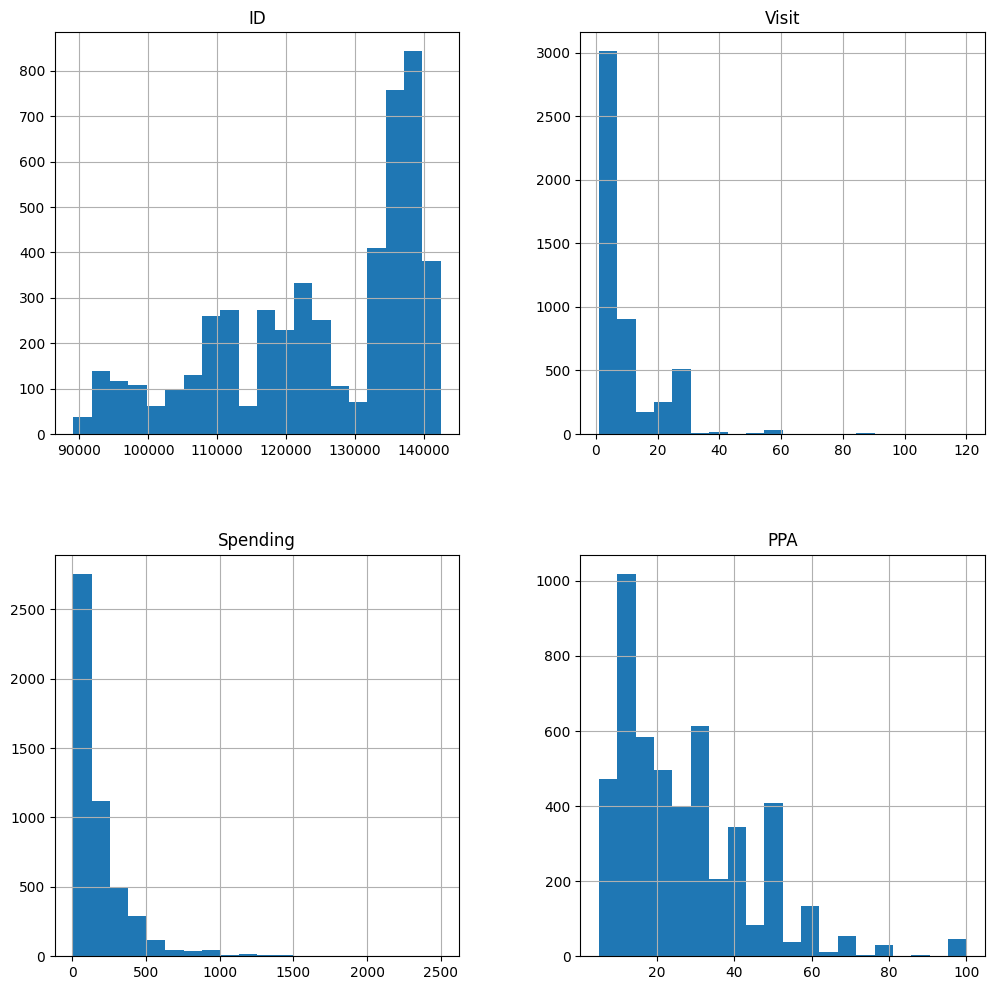

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

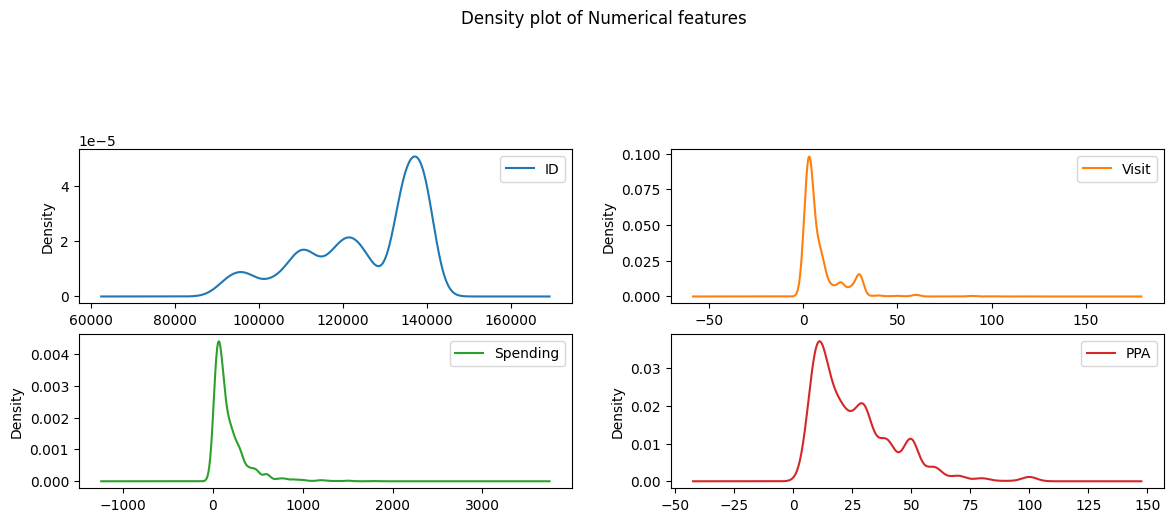

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

**Nhận xét:**
- `Visit`: lệch phải mạnh, rất nhiều khách ghé ít, số ít khách ghé rất nhiều lần.
- `Spending`: lệch phải mạnh, hầu hết khách chi tiêu thấp, chỉ vài khách chi cực cao.
- `PPA`: lệch phải, chi tiêu mỗi lần đa phần thấp, có một nhóm nhỏ tiêu nhiều.

In [ ]:
# Number Unique values in each feature
numerical_data.nunique()

,0
ID,3676
Visit,49
Spending,225
PPA,56


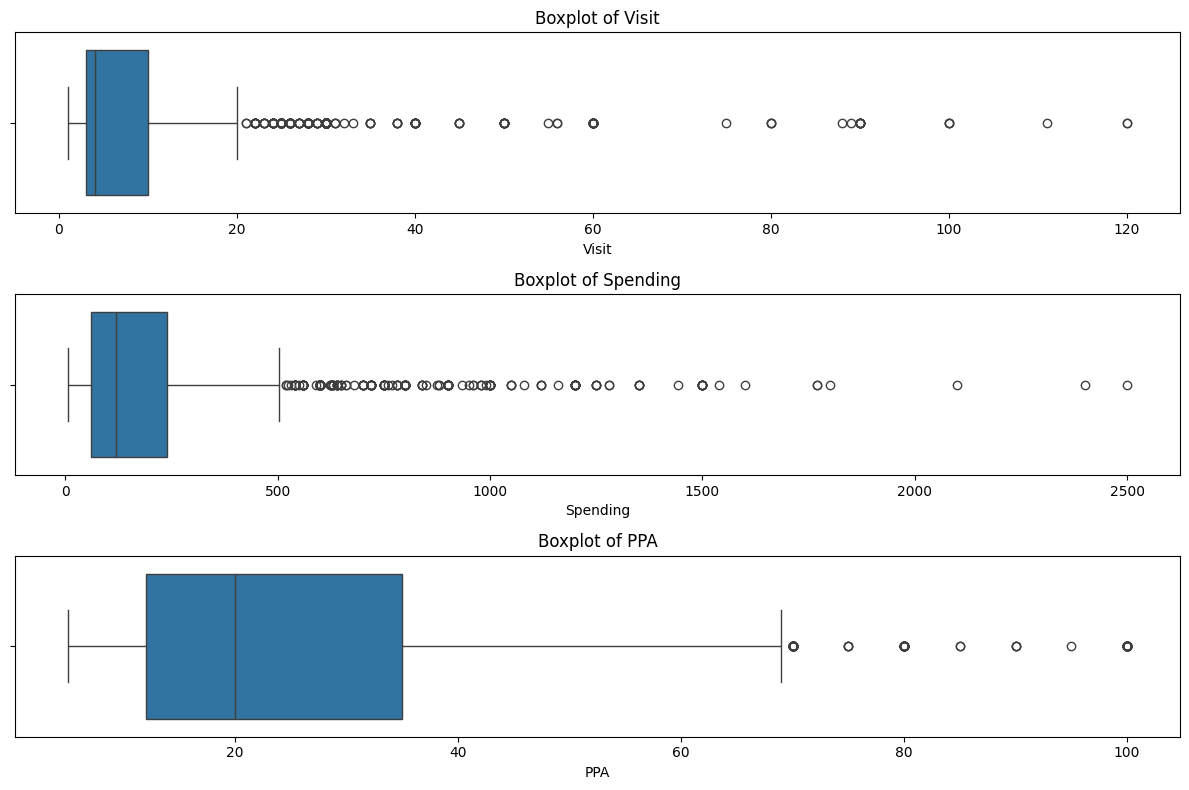

In [ ]:
plt.figure(figsize=(12, 8))

# --- Visit ---
plt.subplot(3, 1, 1)
sns.boxplot(x=numerical_data['Visit'])
plt.title('Boxplot of Visit')

# --- Spending ---
plt.subplot(3, 1, 2)
sns.boxplot(x=numerical_data['Spending'])
plt.title('Boxplot of Spending')

# --- PPA ---
plt.subplot(3, 1, 3)
sns.boxplot(x=numerical_data['PPA'])
plt.title('Boxplot of PPA')

plt.tight_layout()
plt.show()

- Cả 3 biểu đồ đều có cùng một hình dáng đặc trưng: Phân phối lệch phải (Right-Skewed) -> logstranform để dễ nhìn hơn.

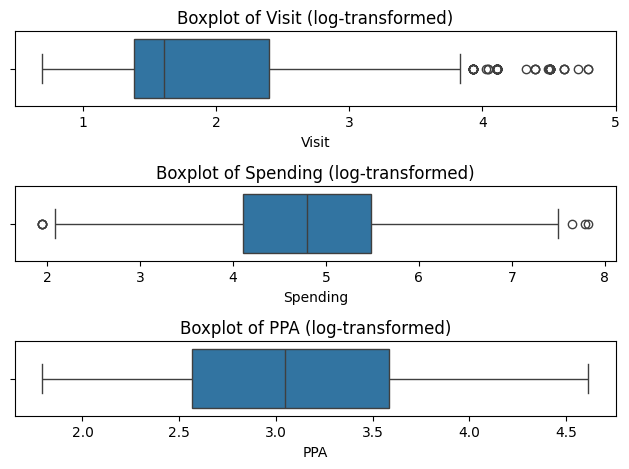

In [ ]:
# --- Visit ---
plt.subplot(3, 1, 1)
sns.boxplot(x=np.log1p(numerical_data['Visit']))  # log-transform
plt.title('Boxplot of Visit (log-transformed)')

# --- Spending ---
plt.subplot(3, 1, 2)
sns.boxplot(x=np.log1p(numerical_data['Spending']))  # log-transform
plt.title('Boxplot of Spending (log-transformed)')

# --- PPA ---
plt.subplot(3, 1, 3)
sns.boxplot(x=np.log1p(numerical_data['PPA']))  # log-transform
plt.title('Boxplot of PPA (log-transformed)')

plt.tight_layout()
plt.show()

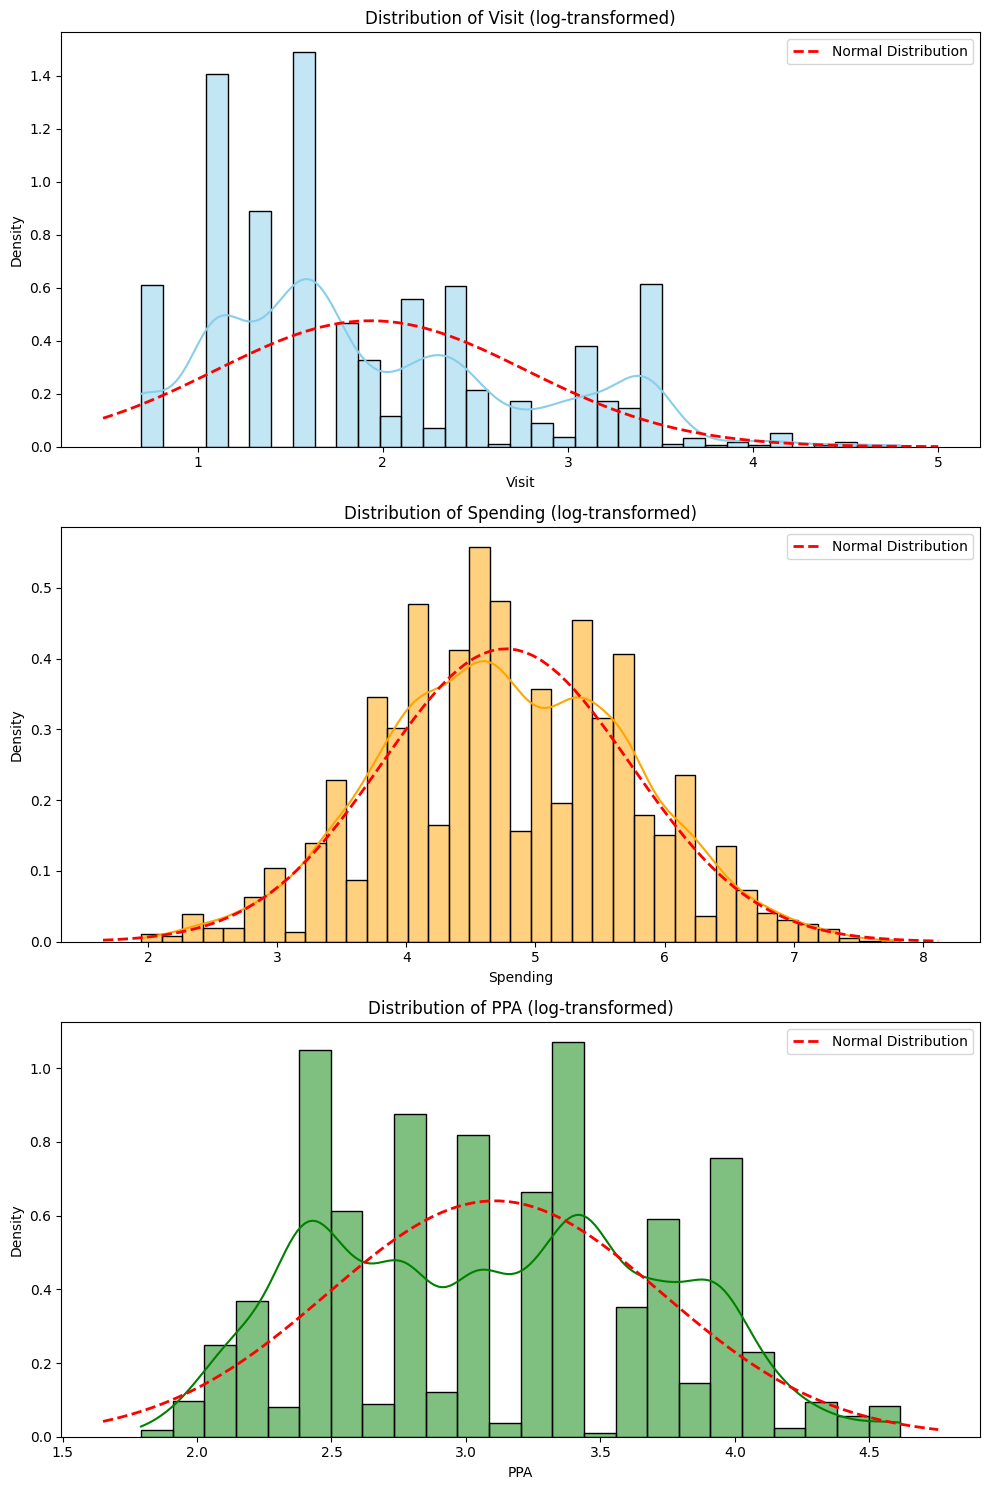

In [ ]:
from scipy.stats import norm
# Thiết lập kích thước tổng thể
plt.figure(figsize=(10, 15))

# --- Visit ---
plt.subplot(3, 1, 1)
# 1. Tính toán dữ liệu log trước để dùng cho việc fit đường chuẩn
data_visit = np.log1p(numerical_data['Visit'])
# 2. Vẽ Histogram và KDE (đường cong thực tế - màu xanh)
sns.histplot(data_visit, kde=True, stat="density", color="skyblue")
# 3. Vẽ đường Phân phối chuẩn lý thuyết (màu đỏ)
mu, std = norm.fit(data_visit)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2, label='Normal Distribution')
plt.title('Distribution of Visit (log-transformed)')
plt.legend()

# --- Spending ---
plt.subplot(3, 1, 2)
data_spending = np.log1p(numerical_data['Spending'])
sns.histplot(data_spending, kde=True, stat="density", color="orange")
mu, std = norm.fit(data_spending)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2, label='Normal Distribution')
plt.title('Distribution of Spending (log-transformed)')
plt.legend()

# --- PPA ---
plt.subplot(3, 1, 3)
data_ppa = np.log1p(numerical_data['PPA'])
sns.histplot(data_ppa, kde=True, stat="density", color="green")
mu, std = norm.fit(data_ppa)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2, label='Normal Distribution')
plt.title('Distribution of PPA (log-transformed)')
plt.legend()

plt.tight_layout()
plt.show()

**Vấn đề:** Các biến `Visit`, `Spending`, `PPA` bị lệch phải (Right-skewed) và chứa nhiều Outliers.

**Giải pháp:** Áp dụng **Log Transformation** sử dụng hàm `np.log1p`.
- Mục đích: Đưa dữ liệu về gần phân phối chuẩn (Normal Distribution) và ổn định phương sai.
- Ứng dụng: Cải thiện hiệu quả cho các mô hình Hồi quy và Phân cụm.

**Hành động:**
1. Tạo các cột feature mới: `_Log`.
2. Giữ lại cột gốc để đối chiếu giá trị thực tế.

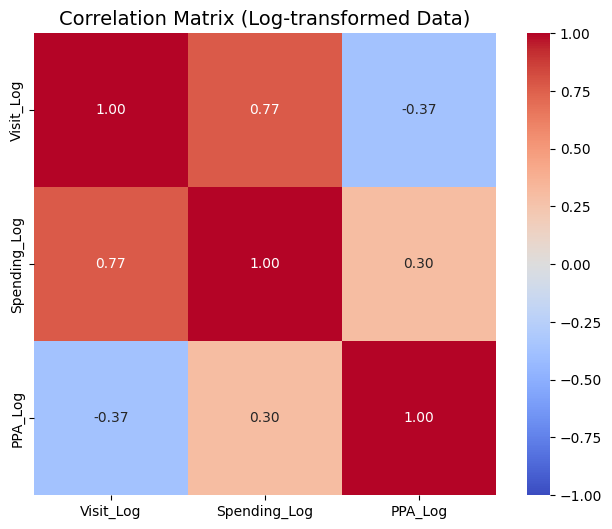

In [ ]:
cols_to_check = ['Visit', 'Spending', 'PPA']

# Tạo bản sao và log transform để check correlation
df_log_check = numerical_data[cols_to_check].apply(np.log1p)
df_log_check.columns = [f'{c}_Log' for c in cols_to_check]

# Tính ma trận tương quan
corr_matrix = df_log_check.corr()

# Vẽ Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,       # Hiện con số cụ thể
            fmt=".2f",        # Làm tròn 2 số thập phân
            cmap='coolwarm',  # Màu nóng lạnh (Đỏ: dương, Xanh: âm)
            vmin=-1, vmax=1,  # Cố định thang đo từ -1 đến 1
            square=True)      # Ô hình vuông cho đẹp

plt.title('Correlation Matrix (Log-transformed Data)', fontsize=14)
plt.show()

## **EDA ON CATEGORICAL FEATURES**

In [ ]:
# Selecting categorical features
categorical_data=customerSegmentation_2017.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['Segmentation', 'Brand']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['Segmentation', 'Brand']


In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: Segmentation
Segmentation
Seg.01 - Mass (<VND 25K)                 2577
Seg.02 - Mass Asp (VND 25K - VND 59K)    2104
Seg.03 - Premium (VND 60K - VND 99K)      218
Seg.04 - Super Premium (VND 100K+)         45
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Brand
Brand
Indepentdent    2194
Street          1525
Chain           1225
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# Kiểm tra xem Segmentation và PPA có khớp nhau không?
# Điều kiện không khớp theo phân khúc PPA
mask_mismatch = (
    ((customerSegmentation_2017['Segmentation'] == 'Seg.01 - Mass (<VND 25K)') & (customerSegmentation_2017['PPA'] >= 25)) |
    ((customerSegmentation_2017['Segmentation'] == 'Seg.02 - Mass Asp (VND 25K - VND 59K)') & ((customerSegmentation_2017['PPA'] < 25) | (customerSegmentation_2017['PPA'] >= 60))) |
    ((customerSegmentation_2017['Segmentation'] == 'Seg.03 - Premium (VND 60K - VND 99K)') & ((customerSegmentation_2017['PPA'] < 60) | (customerSegmentation_2017['PPA'] >= 100))) |
    ((customerSegmentation_2017['Segmentation'] == 'Seg.04 - Super Premium (VND 100K+)') & (customerSegmentation_2017['PPA'] < 100))
)

# In các dòng không khớp
mismatch_rows = customerSegmentation_2017[mask_mismatch]
print(mismatch_rows)

Empty DataFrame
Columns: [ID, Segmentation, Visit, Spending, Brand, PPA]
Index: []


**Nhận xét:**

**SEGMENTATION**

| **Phân khúc**                                  | **Số lượng** | **Ý nghĩa**         |
|------------------------------------------------|--------------|----------------------|
| Seg.01 - Mass (< VND 25K)                      | 2577        | 	Khách hàng chi tiêu thấp, dưới 25.000 VND mỗi lần              |
| Seg.02 - Mass Asp (VND 25K - VND 59K)          | 2104        | 	Khách hàng trung lưu, từ 25.000 đến 59.000 mỗi lần                |
| Seg.03 - Premium (VND 60K - VND 99K)           |   218        | 	Khách hàng chi tiêu cao, từ 60.000 đến 99.000 mỗi lần               |
| Seg.04 - Super Premium (VND 100K+)             |    45        | 	Khách hàng chi tiêu cực cao, trên 100.000 VND mỗi lần  

**BRAND**

| Thương hiệu  | Số lượng |
|:----|:-----|
| **Indepentdent** | 2194 |
| **Street** | 1525 |
| **Chain** | 1225 |

**Nhận xét:**
Số lượng khách hàng lựa chọn thương hiệu tư nhân, độc lập chiếm phần lớn. Có sự chêch lệch không nhiều giữa những khách hàng chọn thương hiệu lề đường và thương hiệu theo chuỗi. `Segmentation` và `PPA` đã khớp với nhau.

**Đề xuất hướng đi:**
- `Brand`: Xử lý lỗi chính tả cột
'Indepentdent'-> 'Independent'.
- `ID`: Đếm số dòng có trùng lặp.



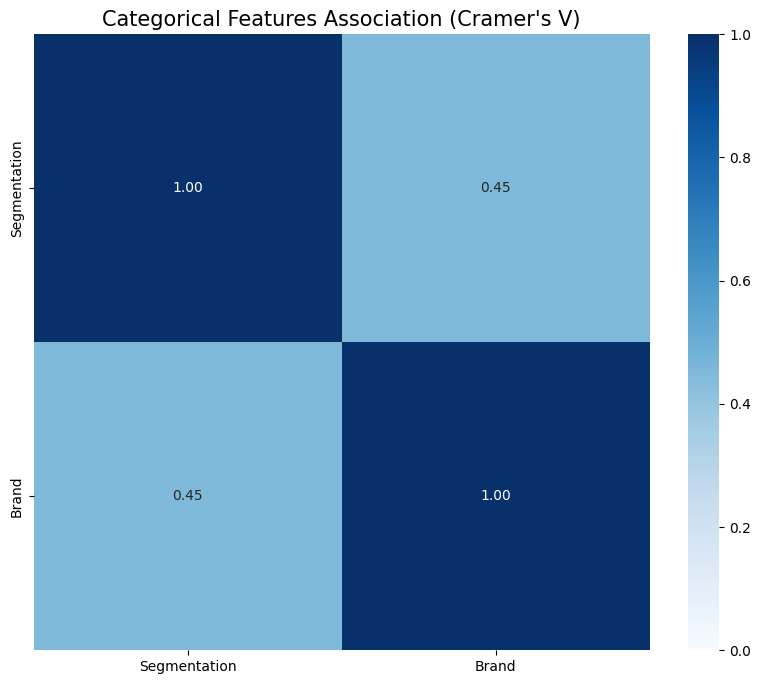

In [ ]:
import scipy.stats as ss
# 1. Định nghĩa hàm tính Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    # Xử lý trường hợp chia cho 0
    if min(r-1, k-1) == 0:
        return 0.0

    return np.sqrt(phi2 / min(r-1, k-1))

# 2. Tạo ma trận rỗng để chứa kết quả
cramers_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# 3. Chạy vòng lặp tính toán từng cặp biến
for col1 in categorical_features:
    for col2 in categorical_features:
        val = cramers_v(categorical_data[col1], categorical_data[col2])
        cramers_matrix.loc[col1, col2] = val

# Chuyển đổi dữ liệu sang kiểu float để vẽ đồ thị
cramers_matrix = cramers_matrix.astype(float)

# 4. Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix,
            annot=True,
            fmt=".2f",
            cmap='Blues',  # Dùng màu đơn sắc vì giá trị chỉ từ 0-1
            vmin=0, vmax=1,
            square=True)

plt.title("Categorical Features Association (Cramer's V)", fontsize=15)
plt.show()

- Ordinal Encoding (Mã hóa theo thứ tự) trước khi đưa vào mô hình

# 🟢 **BRAND_IMAGE**

## **Mô tả dữ liệu**

**BRAND_IMAGE** chứa dữ liệu về nhận thức thương hiệu của người tiêu dùng, đánh giá các thuộc tính và liên kết hình ảnh thương hiệu trên các thành phố và năm khác nhau.

| **Cột**  | **Mô tả** |
|:----|:-----|
| **ID** | Mã định danh duy nhất cho mỗi người trả lời khảo sát. |
| **Year** | Năm thu thập dữ liệu. |
| **City** | Thành phố nơi người trả lời sinh sống. |
| **Awareness** | Thương hiệu mà người trả lời nhận biết. |
| **Attribute** | 	Cách người trả lời cảm nhận về thương hiệu. |
| **BrandImage** | Thương hiệu mà người trả lời gắn với một hình ảnh/ấn tượng cụ thể. |

## **Tổng quan**

In [ ]:
brand_image_copy = brand_image.copy()

In [ ]:
brand_image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106446 entries, 0 to 106445
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          106446 non-null  int64 
 1   Year        106446 non-null  int64 
 2   City        106446 non-null  object
 3   Awareness   106427 non-null  object
 4   Attribute   106446 non-null  object
 5   BrandImage  106446 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [ ]:
brand_image.head()

,ID,Year,City,Awareness,Attribute,BrandImage
0,725118,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
1,725466,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
2,726561,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
3,726862,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
4,727219,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee


**Nhận xét:**
- ID: có thể chuyển sang object vì không có ý nghĩa về mặt giá trị thống kê.
- Year: không có giá trị null.
- Awareness: Có khoảng 19 giá trị null cần xử lý.
- Attribute, BrandImage: không có null.
- City: có thể chia theo khu vực (tùy mục tiêu).

**Để hiểu rõ tập dữ liệu các bước tiếp theo cần thực hiện:**
- Kiểm tra độ dài bất thường của ID (để phát hiện lỗi định danh).
- Xử lý giá trị thiếu ở cột Awareness.
- Kiểm tra sự nhất quán ở các cột còn lại.

## **EDA ON NUMERICAL FEATURES**

In [ ]:
# Selecting numerical features
numerical_data = brand_image_copy.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 2 numerical features: 

['ID', 'Year']


In [ ]:
brand_image.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,106446.0,470500.178663,269798.877655,89102.0,139995.0,442571.5,789631.0,863754.0
Year,106446.0,2018.064887,0.789991,2017.0,2017.0,2018.0,2019.0,2019.0


**Nhận xét:** Được thu tập từ năm 2017 đến năm 2019.

## **EDA ON CATEGORICAL FEATURES**

In [ ]:
# Selecting categorical features
categorical_data=brand_image_copy.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['City', 'Awareness', 'Attribute', 'BrandImage']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['City', 'Awareness', 'BrandImage']


In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         40913
Hồ Chí Minh    30486
Hải Phòng      14655
Đà Nẵng        12598
Nha Trang       4464
Cần Thơ         3330
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Awareness
Awareness
Highlands Coffee    106427
NaN                     19
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: BrandImage
BrandImage
Highlands Coffee    106446
Name: count, dtype: int64
--------------------------------------------------


**Nhận xét:**
- Dữ liệu dồn chủ yếu vào 2 thành phố lớn là Hà Nội và Hồ Chí Minh.
- One-Hot Encoding cho cột City trước khi đưa vào mô hình.
- Attribute có số lượng giá trị duy nhất lớn hơn 20 có thể là: nhiều mô tả khác nhau từ người dùng cho Attribute

In [ ]:
# Kiểm tra nhanh
for col in ['City', 'Awareness', 'Attribute', 'BrandImage']:
    unique_vals = brand_image_copy[col].nunique()
    print(f"{col}: {unique_vals} unique values")

City: 6 unique values
Awareness: 1 unique values
Attribute: 28 unique values
BrandImage: 1 unique values


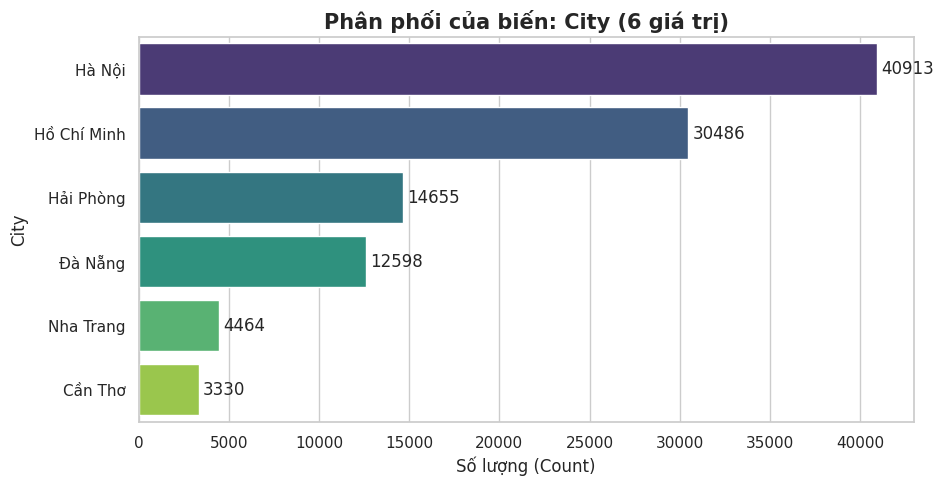

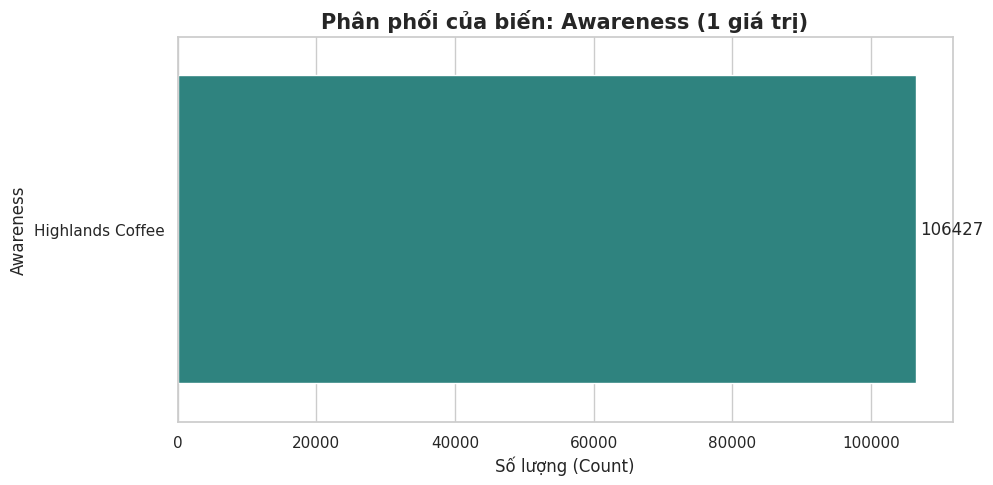

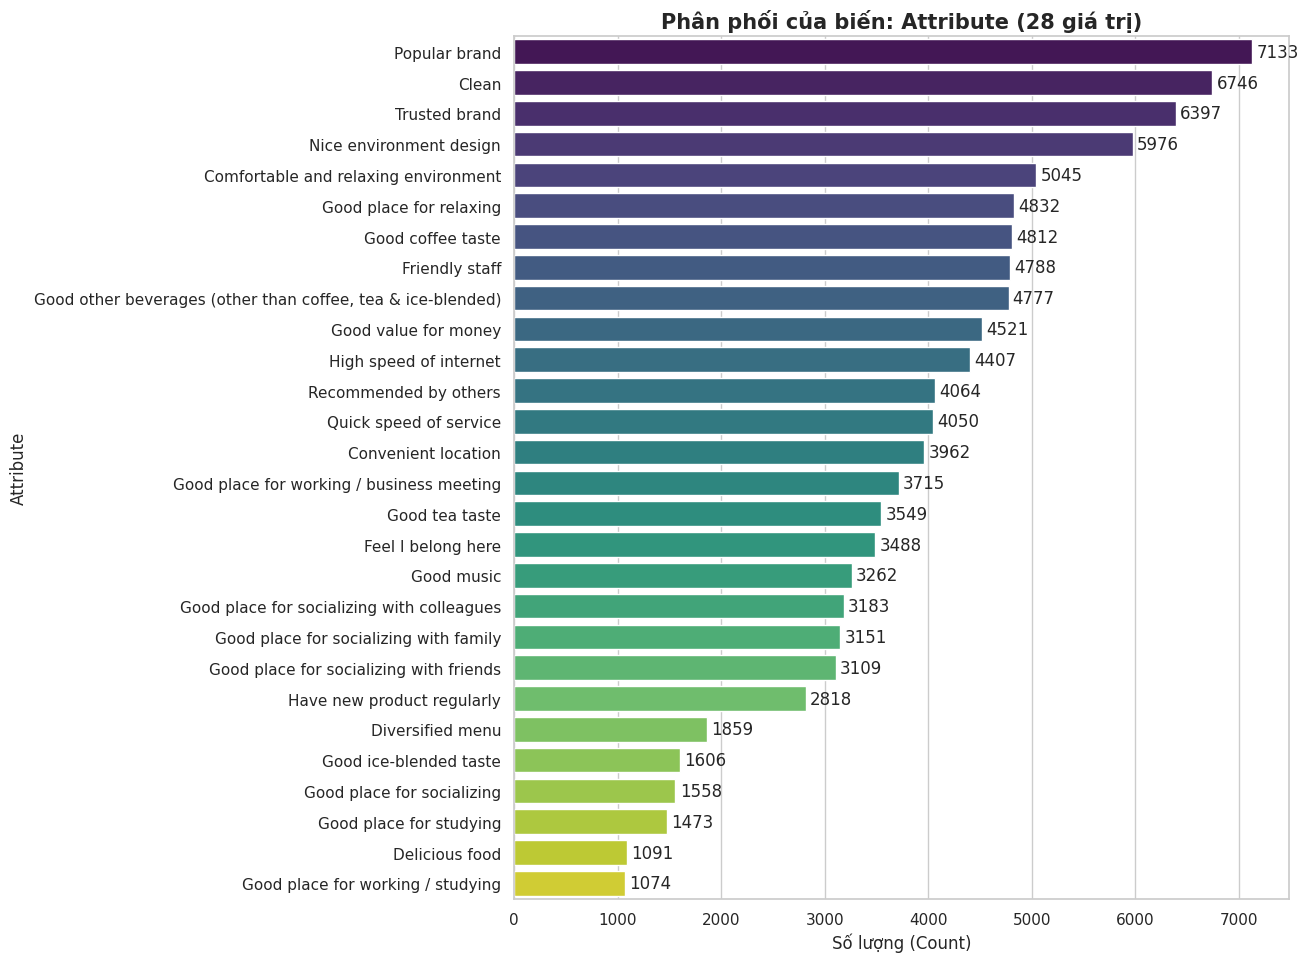

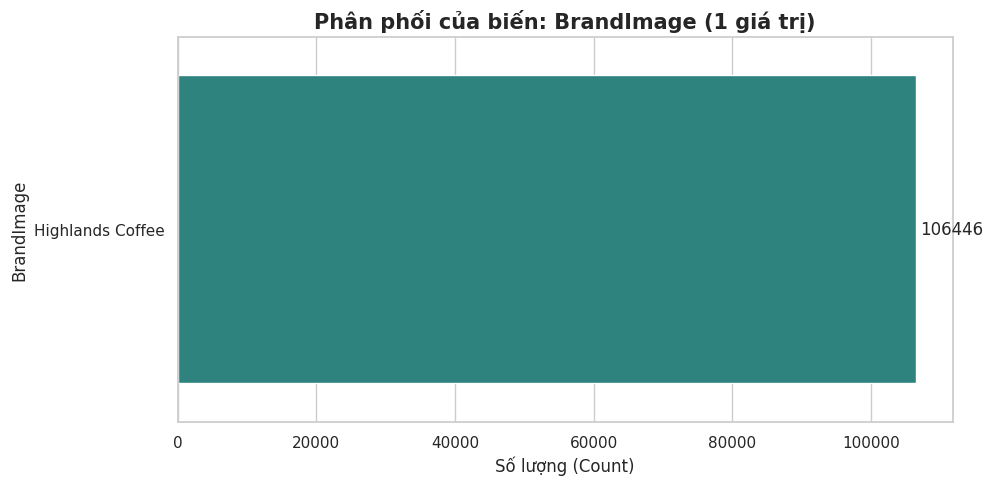

In [ ]:
# Thiết lập style chung cho đẹp (nền trắng, có lưới mờ)
sns.set_theme(style="whitegrid")

for col in categorical_features:
    # 1. Tính toán số lượng và sắp xếp giảm dần
    val_counts = categorical_data[col].value_counts()

    # 2. TỰ ĐỘNG tính chiều cao biểu đồ dựa trên số lượng giá trị
    # (Mỗi thanh cần khoảng 0.4 inch, cộng thêm phần lề)
    n_categories = len(val_counts)
    height = max(5, n_categories * 0.4)

    plt.figure(figsize=(10, height))

    # 3. Vẽ biểu đồ bằng Seaborn
    ax = sns.barplot(
        y=val_counts.index,
        x=val_counts.values,
        palette='viridis',  # Màu chuyển sắc hiện đại
        hue=val_counts.index, # Tránh cảnh báo của seaborn bản mới
        legend=False
    )

    # 4. Trang trí
    plt.title(f'Phân phối của biến: {col} ({n_categories} giá trị)', fontsize=15, fontweight='bold')
    plt.xlabel('Số lượng (Count)', fontsize=12)
    plt.ylabel(col, fontsize=12)

    # Thêm con số cụ thể ở cuối mỗi thanh cho dễ đọc
    for i in ax.containers:
        ax.bar_label(i, padding=3)

    plt.show()

**Nhận xét về Awareness và BrandImage (Tính thương hiệu)**
- Hầu như khách hàng có BrandImage = "Highlands Coffee" cũng có Awareness = "Highlands Coffee".

**Nhận xét về Attribute (Đặc điểm khách hàng quan tâm)**
- Biểu đồ cho thấy rõ sự phân hóa trong sự quan tâm của khách hàng đối với 28 đặc điểm khác nhau.
- Nên gom nhóm các đặc điểm ít được vote nhất vào Others.

**Hành động tiếp theo có thể làm:**
- Kiểm tra sự trùng lặp hoặc sai lệch chính tả giữa các cột (nếu có)..
- Số lượng giá trị null ở Awareness (~19 mẫu) là rất nhỏ và có thể loại bỏ hoặc xử lý đơn giản.
- Chỉ giữ lại Top 10 hoặc 15 giá trị xuất hiện nhiều nhất, tất cả còn lại gán là "Others" ở cột Attribute.

# 🟢 **BRANDHEALTH**

## **Mô tả dữ liệu**

**BRANDHEALTH** chứa các phản hồi khảo sát chi tiết, đo lường nhận thức thương hiệu, mức độ sử dụng, đánh giá thương hiệu và phân khúc khách hàng đối với các thương hiệu cà phê.

| Column  | Description |
|:----|:-----|
| **ID** | Mã định danh duy nhất của mỗi người tham gia khảo sát. |
| **Year** | Năm thu thập dữ liệu. |
| **Brand** |Thương hiệu được đánh giá. |
| **Spontaneous** | Thương hiệu đầu tiên khách hàng nghĩ đến mà không cần gợi ý. |
| **Awareness** | Các thương hiệu mà khách hàng có biết đến. |
| **Trial** | Khách hàng đã từng sử dụng thương hiệu này chưa. |
| **P3M** | Khách hàng có dùng thương hiệu trong 3 tháng gần nhất không. |
| **P1M** | Khách hàng có dùng thương hiệu trong 1 tháng gần nhất không. |
| **Comprehension** | Khách hàng hiểu rõ về thương hiệu đến mức nào. |
| **Brand_Likability** | CMức độ thiện cảm hoặc ưu tiên của khách hàng dành cho thương hiệu. |
| **Weekly** | Khách hàng có sử dụng thương hiệu hàng tuần không (Có/Không). |
| **Daily** | Khách hàng có sử dụng thương hiệu hàng ngày không. |
| **Fre#Visit** | Tổng số lần khách hàng đến cửa hàng. |
| **PPA** | Tính bằng Tổng chi tiêu / Số lượt ghé thăm. (PPA = Spending / Visit). |
| **Spending** | Tổng số tiền khách hàng đã chi cho thương hiệu trong khoảng thời gian khảo sát (đơn vị: nghìn VND). |
| **Segmentation** | Nhãn phân nhóm khách hàng. |
| **NPS#P3M** | Chỉ số đo lường sự hài lòng/khả năng giới thiệu của khách hàng trong 3 tháng qua. |
| **NPS#P3M#Group** | Chia khách hàng thành 3 nhóm dựa trên điểm NPS (Promoter - Ủng hộ, Passive - Trung lập, Detractor - Phản đối). |
| **Spending_use** | Số tiền chi tiêu thực sự được ghi nhận hoặc đưa vào tính toán. |

## Tổng quan

In [ ]:
brandhealth_copy = brandhealth.copy()

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8520 non-null   int64  
 1   Year              8520 non-null   int64  
 2   City              8520 non-null   object 
 3   Brand             8520 non-null   object 
 4   Spontaneous       4063 non-null   object 
 5   Awareness         8516 non-null   object 
 6   Trial             5951 non-null   object 
 7   P3M               4152 non-null   object 
 8   P1M               2698 non-null   object 
 9   Comprehension     2760 non-null   object 
 10  Brand_Likability  1590 non-null   object 
 11  Weekly            1675 non-null   object 
 12  Daily             834 non-null    object 
 13  Fre#visit         2692 non-null   float64
 14  PPA               1971 non-null   float64
 15  Spending          1971 non-null   float64
 16  Segmentation      1971 non-null   object 


**Nhận xét:**
- Bộ dữ liệu có 8520 dòng, 20 cột.
- Các cột định danh và thông tin cơ bản như ID, Year, City, Brand đều đầy đủ, không có giá trị thiếu.
- Các cột hành vi và thái độ của khách hàng (Trial, P3M, P1M, Comprehension, Brand_Likability, Weekly, Daily, Fre#visit, PPA, Spending, Segmentation, NPS) có tỷ lệ missing khá lớn, một số cột chỉ đầy đủ ~20–30% dữ liệu.
Điều này yêu cầu xử lý dữ liệu thiếu phù hợp (imputation hoặc loại bỏ từng cột theo mục tiêu mô hình).
- Các biến số lượng như Fre#visit, PPA, Spending cần kiểm tra outlier
- Một số cột cần kiểm tra tính toán và chuẩn hóa: Fre#visit, PPA, Spending.
- Cần chuẩn hóa kiểu dữ liệu và đổi tên các cột như Fre#visit, NPS#P3M#Group thành tên dễ xử lý hơn.
- Kiểm tra vi phạm logic dữ liệu.
- Các cột đánh giá cảm nhận (Brand_Likability, Comprehension) có thể bổ sung hoặc đối chiếu thông tin từ bảng Brand_Image và Attribute để giảm missing.
- Giải quyết inconsistency cross-table để dữ liệu đồng bộ.

## **EDA ON NUMERICAL FEATURES**

In [ ]:
# Selecting numerical features
numerical_data = brandhealth_copy.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['ID', 'Year', 'Fre#visit', 'PPA', 'Spending', 'NPS#P3M', 'Spending_use']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8520.0,458707.915258,267542.786793,89102.0,138973.25,439875.0,782138.25,863754.0
Year,8520.0,2018.032277,0.783990,2017.0,2017.00,2018.0,2019.00,2019.0
Fre#visit,2692.0,4.426077,4.246506,1.0,2.00,3.0,5.00,35.0
PPA,1971.0,51.989346,15.539613,20.0,40.00,50.0,60.00,200.0
Spending,1971.0,225.806697,217.496526,29.0,98.00,160.0,294.00,2000.0
NPS#P3M,4137.0,8.471839,1.162661,2.0,8.00,9.0,9.00,10.0
Spending_use,1971.0,225.806697,217.496526,29.0,98.00,160.0,294.00,2000.0


**Nhận xét:**
- ID: mã định danh không có ý nghĩa về mặt giá trị thống kê.
- Year: phân phối đồng đều giữa 3 năm, không có giá trị ngoại lai.
- Fre#visit: có sự chênh lệch lớn giữa min và max, cân nhắc log-transform hoặc robust-scaling khi dùng cho mô hình.
- PPA: cần kiểm tra.
- Spending / Spending_use: cần kiểm tra giá trị max.
- NPS#P3M: điểm trung bình khá cao (~8.5) cũng gần với trung vị cho thấy dữ liệu ít biến động, nhiều người dùng hài lòng. Có một số người cho 2 điểm, nhưng không phổ biến.

**Đề xuất:**
- Kiểm tra outlier:
  + Xác định các khách hàng có Spending > 1,000 hoặc PPA > 120 bằng boxplot, z-score hoặc IQR.
  + Nếu xác nhận không hợp lý dùng Winsorization để capping (ví dụ: trần = 99 percentile).
- Kiểm tra tính hợp lệ giữa Fre#visit – Spending – PPA:
  + Spending / Fre#visit ≈ PPA
  + Nếu sai lệch > 30%, đánh dấu nghi vấn hoặc tính lại PPA từ Spending_use.
- Xử lý missing values.

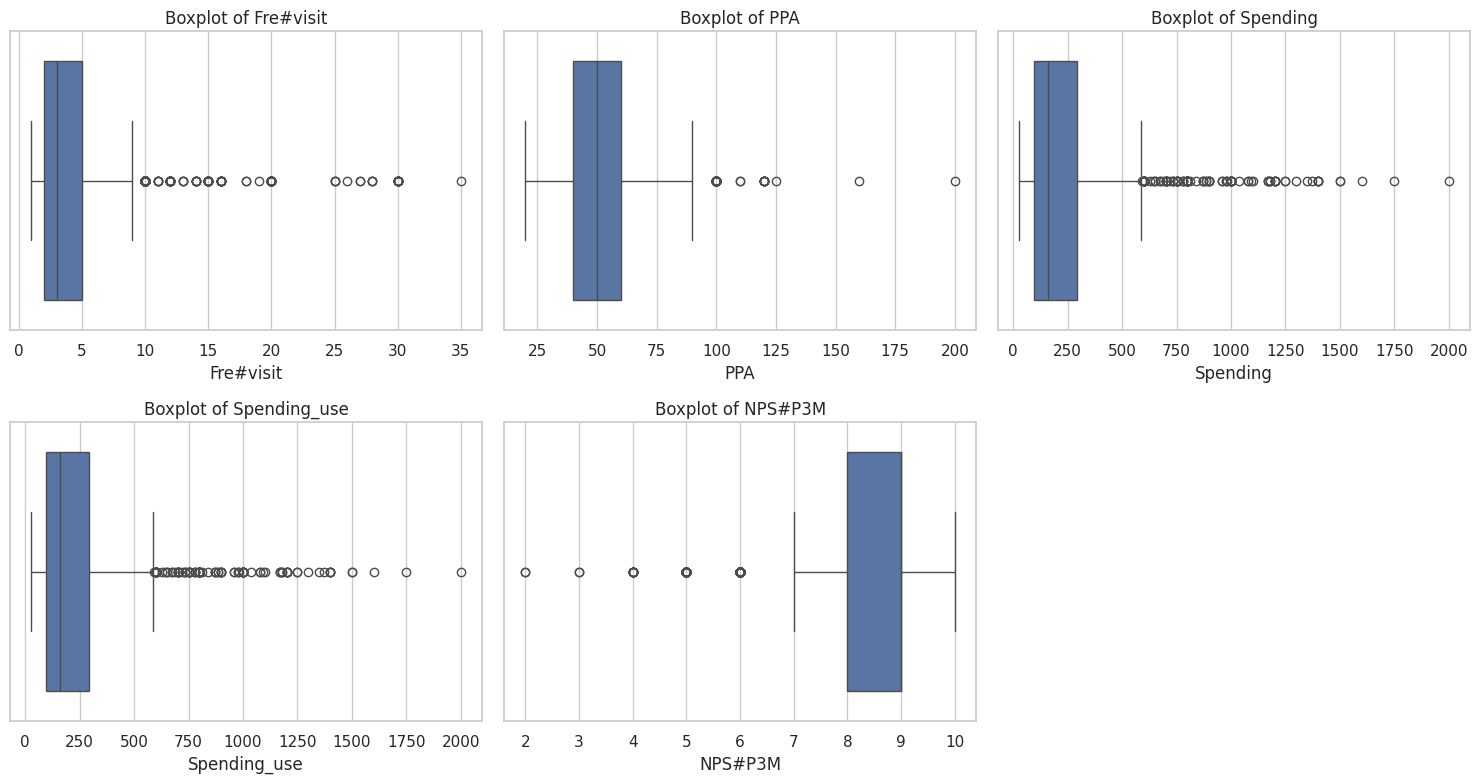

In [ ]:
numerical_cols = ['Fre#visit', 'PPA', 'Spending', 'Spending_use', 'NPS#P3M']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Thống kê mô tả Spending:
count    1971.000000
mean      225.806697
std       217.496526
min        29.000000
1%         30.000000
5%         45.000000
25%        98.000000
50%       160.000000
75%       294.000000
95%       600.000000
99%      1180.000000
max      2000.000000
Name: Spending, dtype: float64

Số lượng bản ghi có Spending > 1180.00: 19


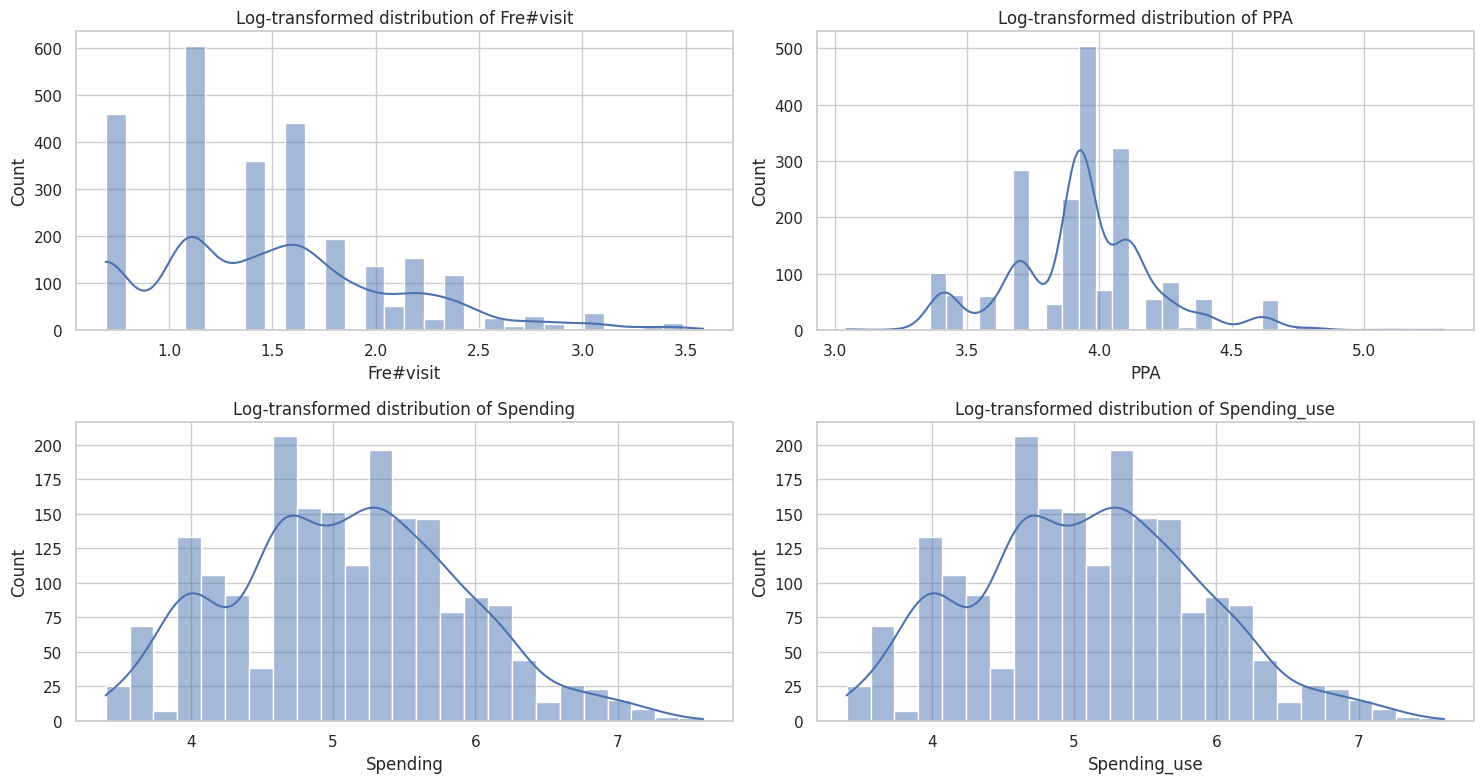

In [ ]:
# 1. Xem xét kỹ các giá trị ngoại lai (Ví dụ cột Spending)
print("Thống kê mô tả Spending:")
print(numerical_data['Spending'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Kiểm tra bao nhiêu dòng vượt quá percentile 99
p99 = numerical_data['Spending'].quantile(0.99)
print(f"\nSố lượng bản ghi có Spending > {p99:.2f}:", len(numerical_data[numerical_data['Spending'] > p99]))

# 2. Thử Log Transformation để xem phân phối mới (Dành cho các cột bị lệch phải)
skewed_cols = ['Fre#visit', 'PPA', 'Spending', 'Spending_use']
plt.figure(figsize=(15, 8))

for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 2, i)
    # Sử dụng log1p để tránh lỗi log(0)
    sns.histplot(np.log1p(numerical_data[col]), kde=True)
    plt.title(f'Log-transformed distribution of {col}')

plt.tight_layout()
plt.show()

**Đề xuất:**
- Kiểm tra và xử lý Outlier (Capping / Winsorization):
  + Thay vì xóa các khách hàng VIP có giá trị cực cao (ví dụ 139 khách hàng với Spending/PPA quá lớn), áp dụng capping:
    + Gán giá trị tối đa hợp lý (ví dụ Spending = 875) cho các outlier.
    + Giữ lại khách hàng quan trọng trong dữ liệu, tránh méo mó mô hình.
  + Kiểm tra các giá trị PPA quá cao có hợp lý hay lỗi nhập liệu.
  + Kiểm tra xem giá trị Max trong Spending/Spending_use có trùng với các outlier về Fre#visit × PPA hay không.
- Xử lý giá trị null
  + Điền hoặc loại bỏ giá trị null trong các cột như Fre#visit, PPA, Spending, Spending_use, NPS#P3M.
  + Với Brand_Likability, có thể điền dựa trên thông tin từ Brand_Image và Attribute.
- Phân nhóm NPS (Feature Engineering):
  + Thay vì giữ NPS dưới dạng số, chia thành nhóm (High / Medium / Low) để dễ phân tích và sử dụng trong mô hình.
- Log-transform các biến phân phối lệch:
  + Áp dụng log-transform cho các biến như Fre#visit, PPA, Spending, Spending_use. Giúp giảm ảnh hưởng của outlier và phân phối dữ liệu gần chuẩn hơn.
- Phân tích tương quan (Correlation Heatmap):
  + Sau log-transform, kiểm tra tương quan giữa các biến số. Ví dụ: xem liệu khách ghé thăm nhiều (Fre#visit) có thực sự chi tiêu nhiều (Spending) hay không.
- Chuẩn hóa và đổi tên cột:
  + Đổi tên các cột khó xử lý như Fre#visit, NPS#3M thành tên đơn giản, dễ thao tác trong code.

## **EDA ON CATEGORICAL FEATURES**

In [ ]:
# Selecting categorical features
categorical_data=brandhealth_copy.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 13 categorical features: 

['City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Segmentation', 'NPS#P3M#Group']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Segmentation', 'NPS#P3M#Group']


**Nhận xét:**
- Các cột là danh mục nhỏ (≤ 20 giá trị khác nhau).

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         2725
Hồ Chí Minh    2420
Hải Phòng      1177
Đà Nẵng        1170
Cần Thơ         529
Nha Trang       499
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Brand
Brand
Highlands Coffee    8520
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Spontaneous
Spontaneous
NaN                 4457
Highlands Coffee    4063
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Awareness
Awareness
Highlands Coffee    8516
NaN                    4
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Trial
Trial
Highlands Coffee    5951
NaN                 2569
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: P3M
P3M
NaN                 4368
Highlands Coffee    4152
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: P1M
P1M
NaN                 5822
High

**Nhận xét:**
- City: phân bố dữ liệu tương đối đồng đều giữa TPHCM và Hà Nội, không có giá trị null, ổn định và có thể sử dụng tốt.
- Comprehension: tỷ lệ thiếu (NaN): 5760 / 8511 ≈ 68% dữ liệu bị thiếu, các giá trị còn lại có vẻ hợp lý và phân tầng nhận biết chi tiết (5 cấp độ).
- Segmentation: tỷ lệ thiếu (NaN): 6549 / 8511 ≈ 77% dữ liệu bị thiếu, phân tầng rõ ràng từ Mass đến Super Premium.
- NPS#P3M#Group: tỷ lệ thiếu (NaN): 4383 / 8511 ≈ 51%, phân loại hợp lý.
- Có một số cột có tỷ lệ NaN quá cao, cần cân nhắc kỹ trước khi đưa vào mô hình One-Hot Encoding hay phân tích sâu.

**Đề xuất:**
- Xử lý giá trị thiếu ở các cột (hoặc cân nhắc giảm chiều).
- Các cột categorical phức tạp, nhiều nhãn ít phổ biến có thể gom nhóm để giảm số lượng category, tránh dữ liệu quá phân tán.

In [ ]:
# Kiểm tra nhanh
cols_to_check = ['Trial', 'P3M', 'P1M', 'Weekly', 'Daily']
for col in cols_to_check:
    print(f"--- {col} ---")
    print(brandhealth[col].value_counts(dropna=False))
    print()

--- Trial ---
Trial
Highlands Coffee    5951
NaN                 2569
Name: count, dtype: int64

--- P3M ---
P3M
NaN                 4368
Highlands Coffee    4152
Name: count, dtype: int64

--- P1M ---
P1M
NaN                 5822
Highlands Coffee    2698
Name: count, dtype: int64

--- Weekly ---
Weekly
NaN                 6845
Highlands Coffee    1265
Not Applicable       410
Name: count, dtype: int64

--- Daily ---
Daily
NaN                 7686
Not Applicable       758
Highlands Coffee      76
Name: count, dtype: int64



**Nhận xét:**
- Những cột này chứa giá trị không đúng với định dạng mô tả trong bộ dữ liệu. Hơn nữa, còn chứa rất nhiều giá trị null đã được quan sát ở phần overview. Ta sẽ cân nhắc giảm chiều dữ liệu ở phần pre-processing đối với bộ dữ liệu này để nhất quán và đảm bảo chất lượng phân tích sau này.
- Tạo một bảng tổng hợp (DataFrame) với index là tên thương hiệu và các cột là 5 giai đoạn: Trial -> P3M (Used in past 3 months) -> P1M (Past 1 month) -> Weekly -> Daily.

# 🟢 **SA#VAR**

## **Mô tả dữ liệu**

**SA#VAR** chứa thông tin hồ sơ chi tiết về nhân khẩu học và hành vi của khách ghé quán cà phê, bao gồm thu nhập (MPI), độ tuổi, giới tính, quy mô nhóm, nghề nghiệp và mức độ yêu thích thương hiệu, nhằm phục vụ phân khúc và phân tích nhắm mục tiêu.

| Cột  | Mô tả |
|:----|:-----|
| **ID** | Mã định danh duy nhất của khách hàng (người trả lời). |
| **City** | Thành phố nơi người trả lời sinh sống hoặc địa điểm quán cà phê. |
| **Group_size** | Số lượng người trong nhóm đi cùng trong lần ghé thăm. |
| **Age** | Độ tuổi cụ thể của người trả lời. |
| **MPI#Mean** | Thu nhập cá nhân trung bình hàng tháng (dạng số, ví dụ: 5499 = 5,499 triệu VND). |
| **TOM** | Thương hiệu cà phê được khách hàng nhớ đến đầu tiên. |
| **BUMO** | Thương hiệu được khách hàng sử dụng thường xuyên nhất hiện tại. |
| **BUMO_Previous** | Thương hiệu từng được sử dụng thường xuyên nhất trước đây (nếu có). |
| **MostFavourite** | Thương hiệu yêu thích nhất của người trả lời. |
| **Gender** | Giới tính của người trả lời. |
| **MPI#detail** | Chi tiết khoảng thu nhập (dạng văn bản). |
| **Age#group** |Nhóm độ tuổi (phân loại chính). |
| **Age#group2** | Nhóm độ tuổi (cách phân loại khác/nhãn phụ). |
| **MPI** | Phân loại nhóm thu nhập. |
| **MPI#2** | Phân khúc thu nhập (đã được gộp nhóm). |
| **Occupation** | Nghề nghiệp cụ thể của người trả lời. |
| **Occupation#group** | Nhóm nghề nghiệp chung. |
| **Year** | Năm thu thập dữ liệu. |
| **MPI_Mean_Use** | Tương tự cột MPI#Mean; thường được dùng riêng cho mục đích xử lý dữ liệu hoặc báo cáo. |'
| **Col** |Cập nhật ngày 12/06: Col là một cột bổ sung được tạo ra trong quá trình xử lý dữ liệu của công ty. Cột này không có ý nghĩa phân tích trong bối cảnh này. |

## Tổng quan

In [ ]:
sa_var_copy = sa_var.copy()

In [ ]:
sa_var_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11761 entries, 0 to 11760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11761 non-null  int64  
 1   City              11761 non-null  object 
 2   Group_size        11746 non-null  float64
 3   Age               11752 non-null  float64
 4   MPI#Mean          8044 non-null   float64
 5   TOM               11761 non-null  object 
 6   BUMO              11761 non-null  object 
 7   BUMO_Previous     6096 non-null   object 
 8   MostFavourite     11761 non-null  object 
 9   Gender            11761 non-null  object 
 10  MPI#detail        8076 non-null   object 
 11  Age#group         11752 non-null  object 
 12  Age#Group#2       11752 non-null  object 
 13  MPI               8044 non-null   object 
 14  MPI#2             8044 non-null   object 
 15  Occupation        11761 non-null  object 
 16  Occupation#group  11761 non-null  object

In [ ]:
sa_var_copy.head()

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use
0,348226,Cần Thơ,3.0,29.0,5499.0,Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
1,358485,Hà Nội,3.0,25.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
2,360729,Cần Thơ,3.0,25.0,5499.0,Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
3,360737,Cần Thơ,3.0,24.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,20 - 24 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Skilled Labor (tailor, machinist, carpenter, e...",Blue Collar,2018,3,5499.0
4,361753,Cần Thơ,3.0,26.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Semi-skilled labor (salesperson, waiter, photo...",Blue Collar,2018,3,5499.0


In [ ]:
sa_var_copy.isna().sum()

,0
ID,0
City,0
Group_size,15
Age,9
MPI#Mean,3717
TOM,0
BUMO,0
BUMO_Previous,5665
MostFavourite,0
Gender,0


**Nhận xét:**
- Các biến quan trọng về định danh và hành vi tiêu dùng như `ID`, `City`, `TOM` (Top of Mind), `BUMO` (Brand Used Most Often), `MostFavourite`, `Gender`, `Occupation` đều không có giá trị thiếu.
- Các cột liên quan đến thu nhập (`MPI#Mean`, `MPI`, `MPI#2`, `MPI#detail`) bị thiếu khoảng 31% dữ liệu (chỉ có ~8000/11761 dòng). Điều này dễ hiểu vì thu nhập là thông tin nhạy cảm, khách hàng thường từ chối trả lời.
- `BUMO_Previous` có ~48% giá trị thiếu.
- `Age` & `Group_size`: Số lượng giá trị thiếu rất ít (<5%).
- Cột `ID` phải là object.

**Đề xuất hướng đi:**

- Cần phân tích sâu các cột thu nhập (`MPI`, `MPI#2`, `MPI#Mean`, `MPI#detail`)


- Cột `BUMO_Previous`
- Missing gần 50% và mang ý nghĩa *không nhớ / không trả lời*.
- Fill NaN = `"Unknown"`.

- Cột `Age` và `Age#group`, `Age#Group#2`
- Tỷ lệ thiếu < 5%. Drop luôn các dòng NA
- Giữ `Age#Group#2` làm biến chính cho mô hình, bỏ `Age#group`

- Cột `Group_size`: Drop NA

- Cột định danh (`ID`)
    - Chuyển sang `object`.
    - Dùng làm khóa để merge → không đưa vào clustering.

## **EDA ON NUMERICAL FEATURES**

In [ ]:
# Selecting numerical features
numerical_data = sa_var_copy.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['ID', 'Group_size', 'Age', 'MPI#Mean', 'Year', 'Col', 'MPI_Mean_Use']


In [ ]:
sa_var_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11761.0,443662.766006,267593.520685,89100.0,138421.0,434078.0,767775.0,863754.0
Group_size,11746.0,3.287843,1.332049,1.0,2.0,3.0,4.0,35.0
Age,11752.0,35.233237,10.829025,16.0,27.0,34.0,43.0,60.0
MPI#Mean,8044.0,7335.741671,4667.292681,1499.0,5499.0,6999.0,8249.0,112499.0
Year,11761.0,2017.988436,0.784221,2017.0,2017.0,2018.0,2019.0,2019.0
Col,11761.0,3.220900,1.105033,0.0,2.0,3.0,4.0,5.0
MPI_Mean_Use,8044.0,7335.741671,4667.292681,1499.0,5499.0,6999.0,8249.0,112499.0


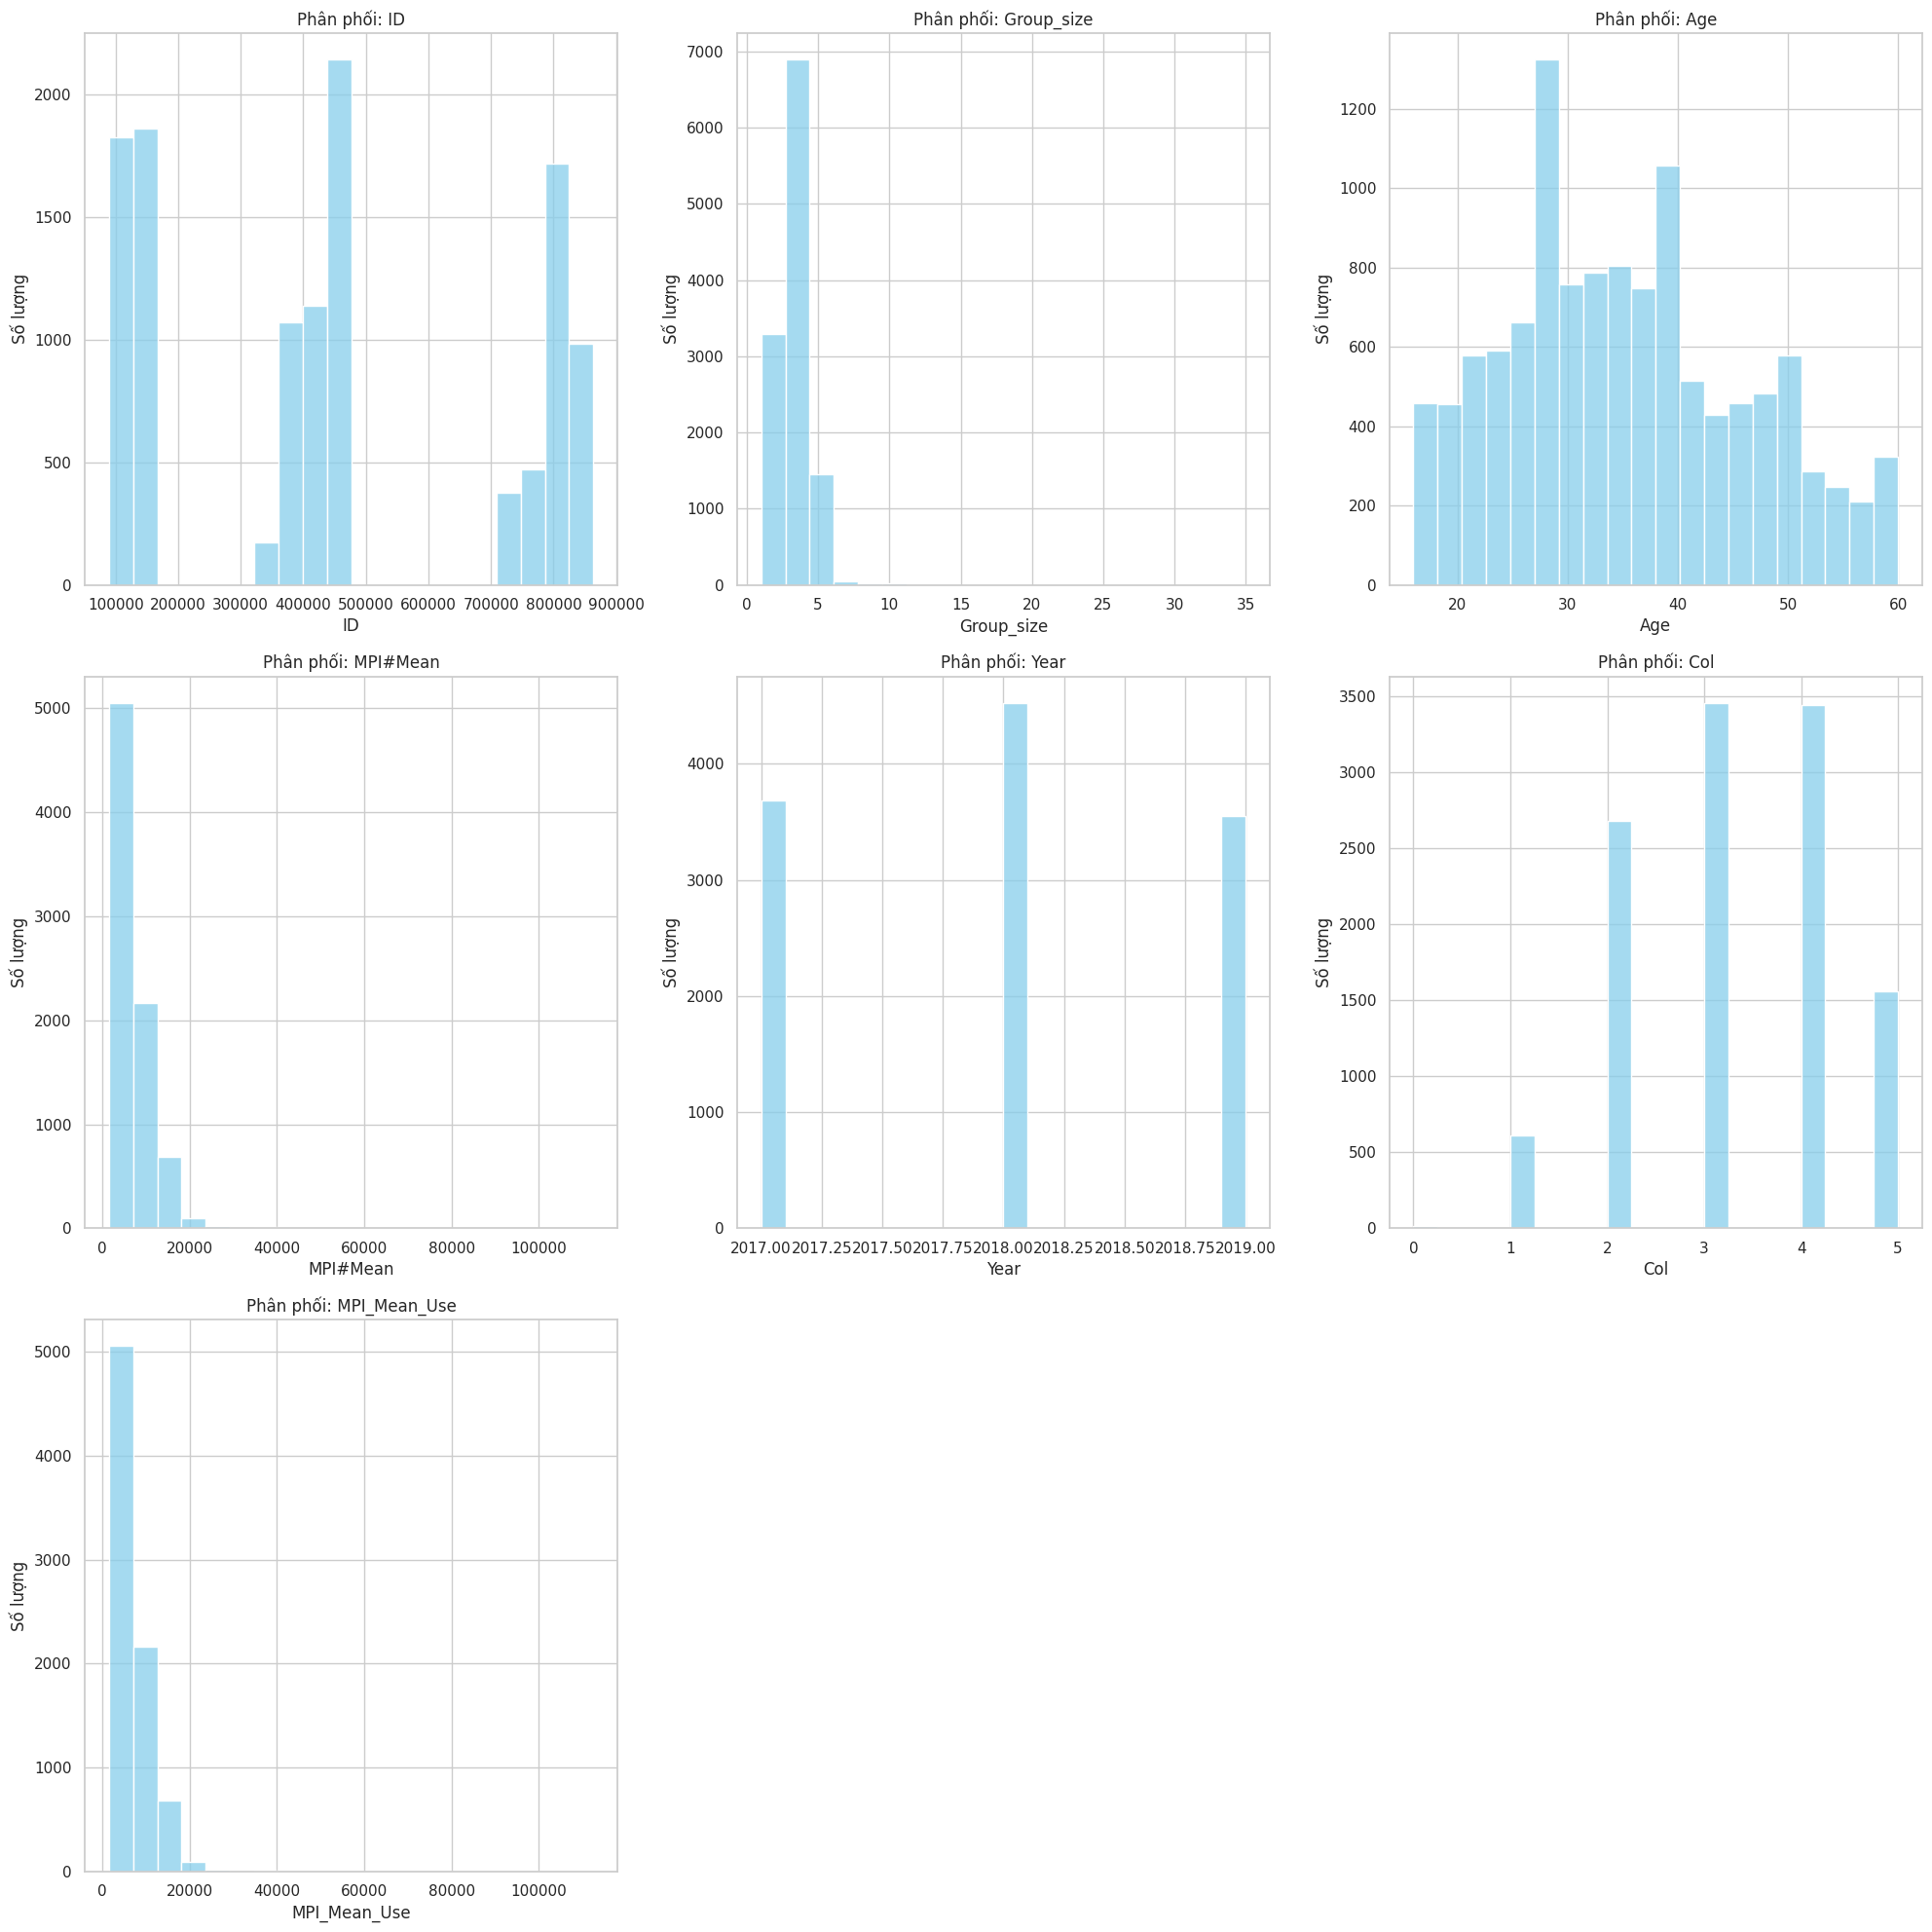

In [ ]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(sa_var_copy[col], bins=20, color='skyblue')
    plt.title(f'Phân phối: {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

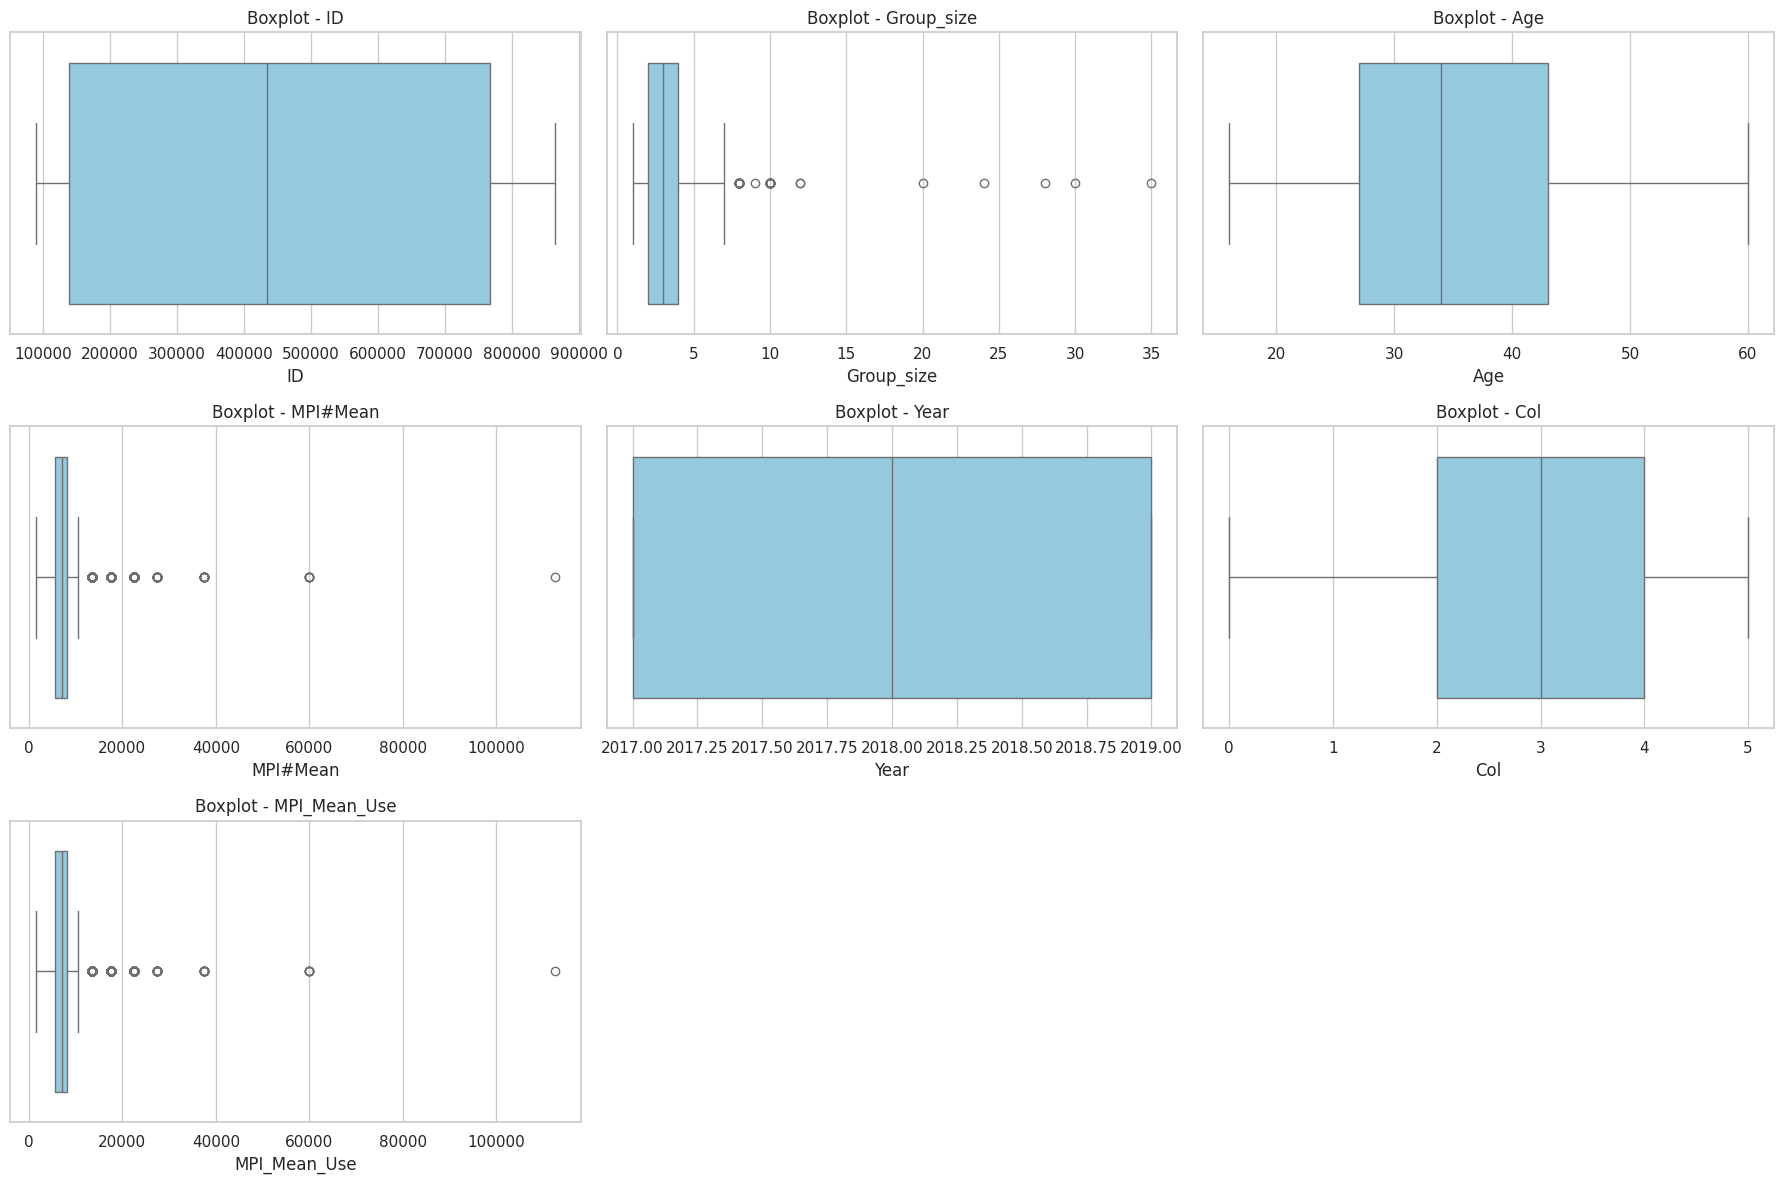

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=sa_var_copy[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Nhận xét:**
- `Group_size`: Có nhiều giá trị từ 10, 15, 20, 30 đến hơn 35 người. Những giá trị này nằm xa khỏi phần lớn dữ liệu (1–6 người).
- `Age`: Phân phối khá ổn định.
- `MPI#Mean`: Phân phối lệch phải mạnh (skewed), tồn tại nhiều outlier với giá trị lên đến 100.000+.
- `Year`: Không có outlier (chỉ 2017–2019).

Các outlier chủ yếu xuất hiện ở `Group_size` và `MPI#Mean`. Tuy nhiên, cách xử lý cần tuân theo mục tiêu phân cụm khách hàng.

**Đề xuất hướng đi:**
- Xóa cột `MPI_Mean_Use`, vì dữ liệu trùng hoàn toàn với `MPI#Mean`

## **EDA ON CATEGORICAL FEATURES**

In [ ]:
# Selecting categorical features
categorical_data=sa_var_copy.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 13 categorical features: 

['City', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation', 'Occupation#group']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['City', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation#group']


**Nhận xét:**
- Bộ dữ liệu có **13 biến phân loại** (`object`).
- Trong đó, có **8 biến có số lượng giá trị ≤ 20**, phù hợp để thực hiện **One-Hot Encoding**:
  - `City`, `Gender`, `MPI#detail`, `Age#group`, `Age#Group#2`, `MPI`, `MPI#2`, `Occupation#group`
- Các biến còn lại như `TOM`, `BUMO`, `BUMO_Previous`, `MostFavourite`, `Occupation` có **số lượng giá trị duy nhất lớn**, có thể chứa dữ liệu dạng free text hoặc nhiều hạng mục nhỏ → cần xử lý nâng cao hơn nếu muốn đưa vào mô hình.

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hồ Chí Minh    3037
Hà Nội         3036
Cần Thơ        1623
Đà Nẵng        1617
Hải Phòng      1571
Nha Trang       877
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Gender
Gender
Female    6565
Male      5196
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: MPI#detail
MPI#detail
NaN                                          3685
From 4.5 millions to 6.49 millions VND       1731
From 6.5 millions to 7.49 millions VND       1504
From 7.5 millions to 8.99 millions VND       1180
From 9 millions to 11.99 millions VND         984
Under 3 millions VND                          950
From 3 millions to 4.49 millions VND          865
From 12 millions to 14.99 millions VND        405
From 15 millions to 19.99 millions VND        282
From 20 millions to 24.99 millions VND         98
Refuse                                         32
From 25 millions to 29.99 millions VND         25
From 30 millions to 

**Nhận xét**:
- `City`: Phân bố theo thành phố hợp lý, không có giá trị thiếu
- `Gender`: Phân bố Male–Female cân đối, không có missing.
- `MPI#detail`: Thiếu ~31%, các nhóm thu nhập phân bố hợp lý nhưng có nhiều band nhỏ.
- `Age#group`: Các nhóm tuổi phân bố hợp lý.
- `Age#Group#2`: Nhóm tuổi chi tiết hơn - MPI: Giá trị tương tự MPI#detail nhưng thiếu lớn (~31%).
- `MPI#2`: Bản sao của `MPI`, thêm thứ tự “1.”, “2.”, “3.”.
- `Occupation#group`: Phân bố nghề nghiệp hợp lý, có nhóm “Refuse”.

**Đề xuất:**
- `City`, `Occupation#group`: Chuẩn hóa text (strip), giữ nguyên các thành phố, mã hóa OneHot.
- Chỉ giữ **1 biến thu nhập cuối cùng** dạng phân nhóm `MPI#detail`.
- Xử lí `MPI#detail` theo thứ tự:
    - Nếu `MPI#detail` có giá trị → giữ nguyên.
    - Nếu `MPI#detail` bị thiếu nhưng có `MPI#Mean` → map theo `MPI#Mean`.
    - Nếu vẫn thiếu → fill "Unknown".
    - Drop hoàn toàn các cột: `MPI`, `MPI#2`, `MPI#Mean`, `MPI_Mean_Use`.
- Bỏ `Age#group` để tránh trùng (Dữ liệu tương tự với `Age#Group#2`).

In [ ]:
non_categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() > 20]

In [ ]:
for col in non_categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: TOM
TOM
Other 1                                          3674
Street / Half street coffee (including carts)    2346
Indepedent Cafe                                  1753
Highlands Coffee                                 1689
Trung Nguyên                                      599
Milano                                            386
Cộng Cà Phê                                       299
Aha Cafe                                          240
The Coffee House                                  229
Other Branded Cafe Chain                          119
Phúc Long                                          92
Urban Station                                      86
Starbucks                                          62
Passio                                             30
Viva Star                                          30
Long Cafe                                          25
Mê Trang                                           22
Other 2                                            13
Mộc Miên  

**Nhận xét:**


- `TOM`: Phân bố lệch mạnh về nhóm “Other 1” và “Street / Half street coffee”, sau đó đến Independent Cafe và Highlands Coffee. Đây là biến thể hiện mức độ Top-of-mind nên đa dạng thương hiệu là hợp lý.


- `BUMO`: Phân bố tương tự `TOM`, nhưng thứ tự khác (Street coffee và Independent Cafe cao hơn Highlands). Không có missing. Thể hiện thương hiệu sử dụng thường xuyên nhất – biến quan trọng trong phân cụm hành vi.


- `BUMO_Previous`: Thiếu ~48% (NaN), ngoài ra nhiều khách trả lời “Don’t have any brands”. Đây không phải missing thật mà do khách không nhớ hoặc không nhập. Có nhiều brand nhỏ, hiếm – hợp lý cho dữ liệu hành vi quá khứ.


- `MostFavourite`: Phân bố hợp lý, tập trung vào “Other 1”, Highlands, Independent Cafe, Street coffee. Không có missing. Biến quan trọng để đo mức độ yêu thích thương hiệu.


- `Occupation`: Rất đa dạng, gồm 20+ nghề, không missing thực sự (chỉ vài trường hợp “Refuse”). Một số nghề hiếm nhưng vẫn phản ánh hành vi thực tế trong khảo sát.




**Đề xuất:**


- `TOM`, `BUMO`, `MostFavourite`:
  - Chuẩn hóa text (`strip`), sửa lỗi chính tả nếu có (vd: “Indepedent Cafe” → “Independent Cafe”).
  - Giữ nguyên các giá trị vì mỗi brand/nhóm brand mang ý nghĩa khác nhau.
  - Encode bằng OneHot (hoặc Target Encoder trong mô hình nâng cao).


- `BUMO_Previous`:
  - Fill NaN bằng `"Unknown"` (không phải missing thật, mà là “không nhớ/không khai báo”).
  - Giữ nguyên các giá trị còn lại.
  - Encode OneHot.
  - (Tùy chọn) thêm biến nhị phân `Has_PreviousBrand` để phản ánh việc có/không có brand dùng trước đây.


- `Occupation`:
  - Chuẩn hóa text (`strip`, thống nhất khoảng trắng).
  - Giữ nguyên tất cả nhóm nghề vì mang ý nghĩa hành vi dùng cà phê (thu nhập, lifestyle).
  - Nhóm “Refuse” được xem là 1 nhóm riêng.
  - Encode OneHot.


# 🟢 **NEEDSTATE**

## **Mô tả dữ liệu**

**NEEDSTATE** ghi lại nhu cầu của người tiêu dùng liên quan đến thời gian trong ngày hoặc hành vi trong ngày, cung cấp thông tin chi tiết về lý do tại sao khách hàng ghé thăm quán cà phê vào những thời điểm cụ thể.

| Cột  | Mô tả |
|:----|:-----|
| **ID** | Mã định danh duy nhất của khách hàng (người trả lời). |
| **City** | Thành phố nơi người trả lời sinh sống hoặc địa điểm quán cà phê. |
| **Year** | Năm thu nhập dữ liệu. |
| **Needstates** | Lý do hoặc động lực cụ thể khi đến quán cà phê. |
| **Day#Daypart** | Bối cảnh thời gian cho trạng thái nhu cầu. |
|**NeedstateGroup** | Một nhóm danh mục lớn hơn gom các nhu cầu tương tự lại với nhau. |



## **Tổng quan**

In [ ]:
needstate_copy = needstate_by_day_daypart.copy()

In [ ]:
needstate_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75251 entries, 0 to 75250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              75251 non-null  int64 
 1   City            75251 non-null  object
 2   Year            75251 non-null  int64 
 3   Needstates      75251 non-null  object
 4   Day#Daypart     75251 non-null  object
 5   NeedstateGroup  75251 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
needstate_copy.isna().sum()

,0
ID,0
City,0
Year,0
Needstates,0
Day#Daypart,0
NeedstateGroup,0


In [ ]:
needstate_copy.head()

,ID,City,Year,Needstates,Day#Daypart,NeedstateGroup
0,725118,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
1,725466,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
2,726561,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
3,726862,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
4,727015,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages


**Nhận xét:**
- Tất cả các cột đều đầy đủ dữ liệu, không có giá trị null.
- `ID` và `Year`: có kiểu dữ liệu int64.
- Các cột còn lại đều là kiểu object.

## **EDA ON NUMERICAL FEATURES**

In [ ]:
# Selecting numerical features
numerical_data = needstate_copy.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 2 numerical features: 

['ID', 'Year']


In [ ]:
needstate_by_day_daypart.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,75251.0,631898.211293,257218.326951,89100.0,439073.0,788931.0,816248.0,863754.0
Year,75251.0,2018.520246,0.737058,2017.0,2018.0,2019.0,2019.0,2019.0


**Nhận xét:**
- Dữ liệu được thu thập từ năm 2017 đến năm 2019.
- `ID` kiểu int64, nhưng chỉ đóng vai trò mã định danh, không mang ý nghĩa phân tích.

**Đề xuất hướng đi:**
- `ID`: chuyển sang kiểu object, kiểm tra độ dài bất thường của ID (nếu dài bất thường thì loại bỏ).
- Kiểm tra sự nhất quán ở các cột còn lại.

## **EDA ON CATEGORICAL FEATURES**

In [ ]:
# Select categorical features
categorical_data = needstate_copy.select_dtypes(include = 'object')

# Transform the features of categorical_data to list
categorical_features = categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['City', 'Needstates', 'Daypart', 'NeedstateGroup']


In [ ]:
# Identify categorical column with unique values
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['City', 'Needstates', 'Daypart', 'NeedstateGroup']


In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         24267
Hồ Chí Minh    18462
Cần Thơ        10467
Đà Nẵng         8753
Hải Phòng       8132
Nha Trang       5170
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Needstates
Needstates
Drinking coffee                                                    17324
Socializing with friends                                           14955
Socializing with family / relatives                                 7051
Enterntainment (watching movies. Playing games, browsing web,…)     6740
Drinking tea                                                        5185
Drinking other beverages (excluding tea, coffee, freeze)            5167
Socializing with colleagues                                         4318
Drinking ice-blended                                                3453
Socialzing                                                          3130
Relaxing (Alone)                                                    2791
Working / Busin

**Nhận xét:**
- Dữ liệu dồn chủ yếu vào 2 thành phố lớn là Hà Nội và Hồ Chí Minh.
- One-Hot Encoding cho cột City trước khi đưa vào mô hình.
- Các cột đều có số lượng giá trị duy nhất nhỏ hơn 20.
- Dữ liệu có xu hướng mất cân bằng => cần xem xét xử lý.

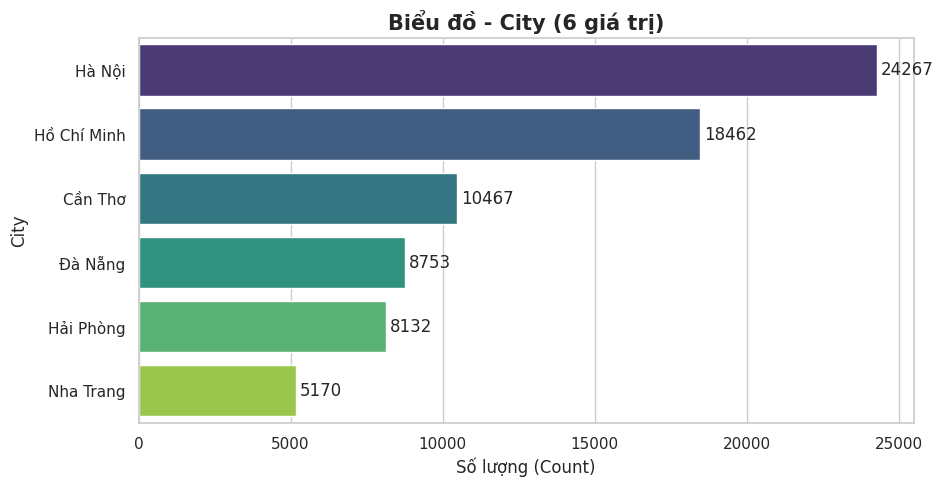

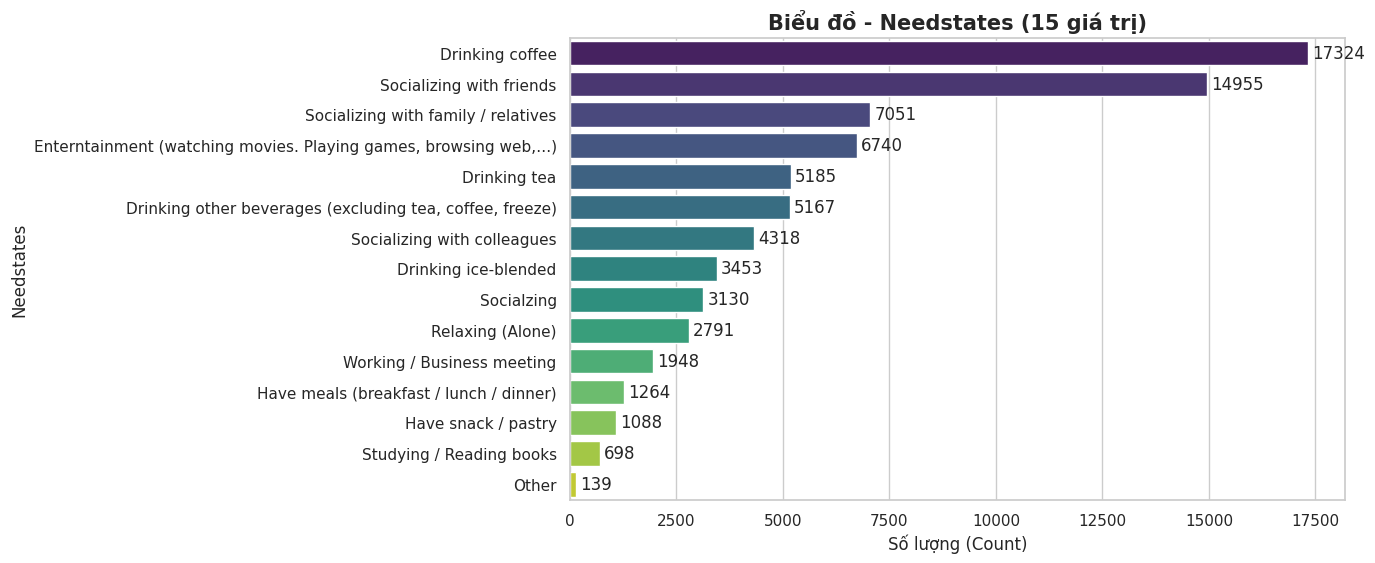

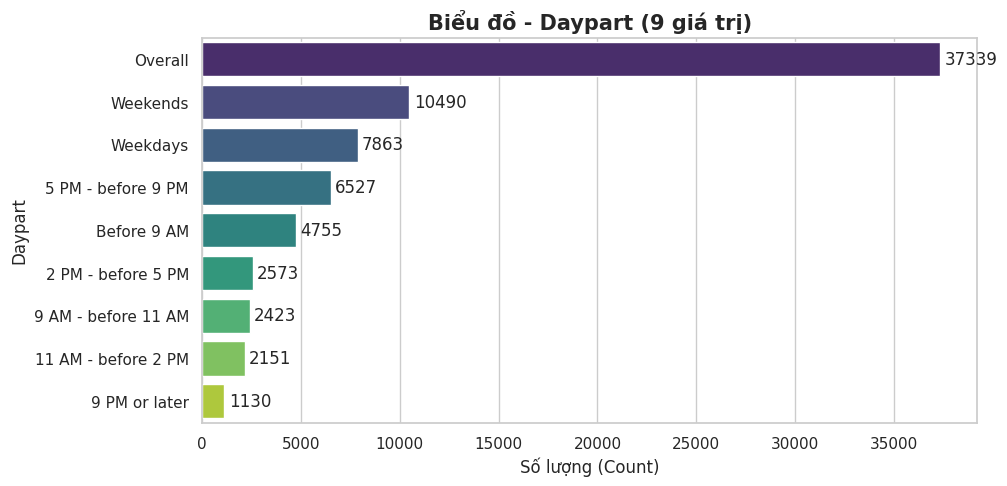

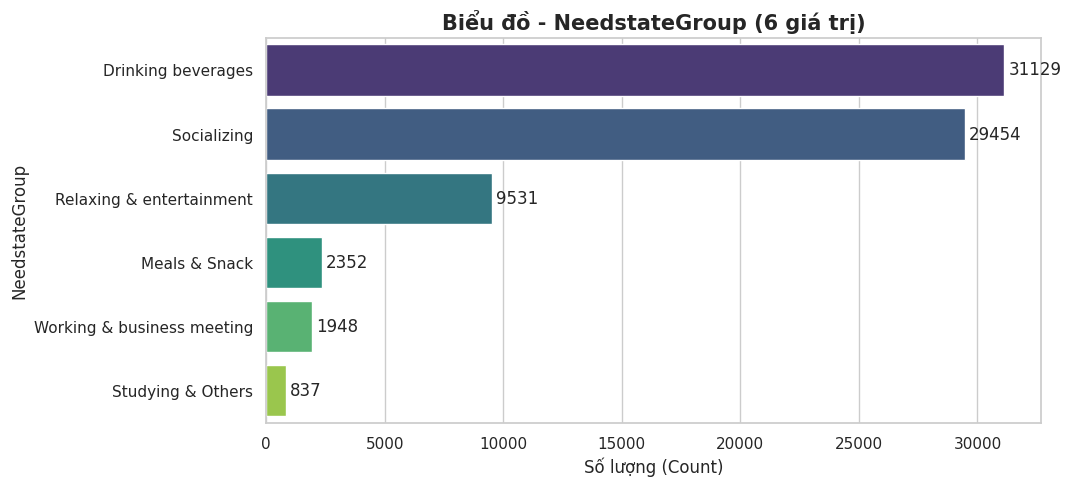

In [ ]:
# Thiết lập style chung
sns.set_theme(style="whitegrid")

for col in categorical_features:
    # 1. Tính toán số lượng và sắp xếp giảm dần
    val_counts = categorical_data[col].value_counts()

    # 2. TỰ ĐỘNG tính chiều cao biểu đồ dựa trên số lượng giá trị
    # (Mỗi thanh cần khoảng 0.4 inch, cộng thêm phần lề)
    n_categories = len(val_counts)
    height = max(5, n_categories * 0.4)

    plt.figure(figsize=(10, height))

    # 3. Vẽ biểu đồ bằng Seaborn
    ax = sns.barplot(
        y=val_counts.index,
        x=val_counts.values,
        palette='viridis',  # Màu chuyển sắc hiện đại
        hue=val_counts.index, # Tránh cảnh báo của seaborn bản mới
        legend=False
    )

    # 4. Trang trí
    plt.title(f'Biểu đồ - {col} ({n_categories} giá trị)', fontsize=15, fontweight='bold')
    plt.xlabel('Số lượng (Count)', fontsize=12)
    plt.ylabel(col, fontsize=12)

    # Thêm con số cụ thể ở cuối mỗi thanh cho dễ đọc
    for i in ax.containers:
        ax.bar_label(i, padding=3)

    plt.show()

**Nhận xét**:  
Sau khi vẽ biểu đồ cho từng biến, ta thấy:


*   `City` phân bố mất cân bằng nặng |  Hà Nội và TP. Hồ Chí Minh chiếm ưu thế.
*   `Needstate` phân bố thành nhiều nhóm và khá đều |  Nhu cầu thưởng thức đồ uống và gặp gỡ chiếm đa số.
*  `Daypart` phân bố lệch | Overall (*không xác định thời gian* hoặc *toàn bộ ngày*) chiếm chủ yếu.
*  `NeedstateGroup` phân bố khá hợp lý | Nhu cầu uống và gặp gỡ chiếm ưu thế.

* Một số từ sai chính tả cần được chỉnh sửa.

**Đề xuất hướng đi:**
- Đổi tên cột `Day#Daypart` thành `Daypart`.
- `Needstate` xử lý sai chính tả :
  - 'Socialzing'-> 'Socializing'
  - 'Enterntainment (watching movies. Playing games, browsing web,…)' -> 'Entertainment'
- `NeedstateGroup` đổi tên giá trị trong cột :
  - 'Relaxing & entertainment'-> 'Relaxing & Entertainment'
  
  - 'Working & business meeting' -> 'Working & Business meeting'


In [ ]:
# Thống kê cột 'Needstates' và 'NeedstateGroup'
for col in ['Needstates', 'NeedstateGroup']:
    print(f"🔹 Column: {col}")
    print(needstate_copy[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: Needstates
Needstates
Drinking coffee                                             17324
Socializing with friends                                    14955
Socializing with family / relatives                          7051
Entertainment                                                6740
Drinking tea                                                 5185
Drinking other beverages (excluding tea, coffee, freeze)     5167
Socializing with colleagues                                  4318
Drinking ice-blended                                         3453
Socializing                                                  3130
Relaxing (Alone)                                             2791
Working / Business meeting                                   1948
Have meals (breakfast / lunch / dinner)                      1264
Have snack / pastry                                          1088
Studying / Reading books                                      698
Other                                       

**Kiểm tra logic:** kiểm tra xem needstate có nằm trong nhóm tương ứng không.

In [ ]:
needstate_to_group = {
    "Drinking coffee": "Drinking beverages",
    "Drinking tea": "Drinking beverages",
    "Drinking ice-blended": "Drinking beverages",
    "Drinking other beverages (excluding tea, coffee, freeze)": "Drinking beverages",
    "Socializing with friends": "Socializing",
    "Socializing with family / relatives": "Socializing",
    "Socializing with colleagues": "Socializing",
    "Socializing": "Socializing",
    "Relaxing (Alone)": "Relaxing & Entertainment",
    "Entertainment": "Relaxing & Entertainment",
    "Working / Business meeting": "Working & Business meeting",
    "Have meals (breakfast / lunch / dinner)": "Meals & Snack",
    "Have snack / pastry": "Meals & Snack",
    "Studying / Reading books": "Studying & Others",
    "Other": "Studying & Others"
}

# Áp dụng kiểm tra
needstate_copy['MappedGroup'] = needstate_copy['Needstates'].map(needstate_to_group)
mismatch = needstate_copy[needstate_copy['MappedGroup'] != needstate_copy['NeedstateGroup']]

# Hiển thị các dòng không khớp (nếu có)
mismatch

,ID,City,Year,Needstates,Daypart,NeedstateGroup,MappedGroup


Như vậy, mọi **needstate** đều đã nằm trong nhóm tương ứng của nó. Sau đó loại bỏ cột tạm thời đã tạo.

In [ ]:
# Remove temporary column
needstate_copy.drop(columns=['MappedGroup'], inplace=True)